# Introdução ao Projeto

  Devido à rápida propagação da doença COVID-19 no mundo, as plataformas de mídias sociais como Twitter, Facebook e Instagram tornaram-se locais onde ocorre uma intensa e contínua troca de informações entre diversas partes e grupos sociais da sociedade. O seguinte trabalho se propõem analisar e tratar dados obtidos na rede social twitter para melhor compreensão da opinião pública nos meses iniciais.

## Equipe do projeto

O projeto foi feito pela dupla de alunos Emily Bezerra Sales (ebs.cid20@uea.edu.br) e Emiliandro Carlos de Moraes Firmino (ecdmf.cid20@uea.edu.br) para o módulo de Programação ministrada pelo Prof. Dr. Tiago Eugenio de Melo (tmelo@uea.edu.br).

## Dependências 

Para a edição do matérial fornecido, foi utilizado a linguagem python junto de suas bibliotecas de manipulação de Array, Data(time) e String para compreensão dos textos, dos autores das mensagens e da data de publicação.

In [ ]:
import string
import array
import datetime
import operator

### Google Drive

A integração com o google drive foi feito para permitir o acesso ao arquivo principal do projeto, pois devido a seu tamanho houve a necessidade do uso de um sistema de host que permitisse arquivos de grande porte - 350mb no caso.

In [ ]:
from google.colab import drive

### Numpy


A biblioteca Numpy foi utilizado para facilitar na programação presente no projeto.

In [ ]:
import numpy as np

### Pandas

A biblioteca Pandas foi adicionado para permitir a interpretação e visualização de arquivos .csv em formato de tabela.

In [ ]:

import pandas as pd

### CSV

A biblioteca CSV foi adiciona para permitir a exportação de arquivo .csv para uso no projeto.

In [ ]:
import csv

### Matplot

A biblioteca matplot foi utilizada para permitir a criação de gráficos para o projeto.

In [ ]:
import matplotlib.pyplot as plt


### Folium

A biblioteca folium foi utilizada para a exibição de mapas com base na geolocalização

In [ ]:
import folium
from folium.plugins import HeatMap


# Preparação para a Leitura de dados

In [ ]:
dados_completos = {} # csv fornecido pelo professor

## Integração do Google Drive

In [ ]:
#@title Carregar Dados Completos (Google Drive) { form-width: "45%" }

montar_drive = True #@param {type:"boolean"}
carregar_completos = True #@param {type:"boolean"}

if (montar_drive): 
  drive.mount('/content/drive')

if(carregar_completos):
  dados_completos = pd.read_csv("/content/drive/My Drive/dados-curso-completo.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Primeiro Uso do Panda

In [ ]:
pd.DataFrame(dados_completos)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


## Dados Nulos

O processo de verificação de duplicatas se iniciou através da observação de arquivos nulos para observar qual o melhor parametro para ser usado. Através do método abaixo foi decidido utilizar os três parametros de texto, data e apelido para montar o arquivo .csv filtrado. 

In [ ]:
dados_completos.isnull().sum() #contando (identificando) dados faltantes

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

### Limpando Dados Nulos


Em equipe foi definido a remoção dos dados nulos para a filtragem de dados, ademais foi criado um método para ser chamado sempre que possível no projeto onde é removido os dados nulos e retornado uma cópia limpa.

In [ ]:
def Limpando_nulos(arquivo):
  arquivo.dropna (inplace=True) #limpando dados nulos de todo o banco
  return arquivo.copy()


In [ ]:
dados_completos_sem_nulo = Limpando_nulos(dados_completos) #csv para filtragem de duplicata


In [ ]:
dados_completos_sem_nulo.isnull().sum()

data          0
usuario       0
apelido       0
texto         0
retweet       0
seguidores    0
idioma        0
lugar         0
pais          0
sigla         0
latitude      0
longitude     0
hashtags      0
dtype: int64

## Dados em Português

In [ ]:
regioes_e_idiomas = dados_completos_sem_nulo.filter(items=['pais','idioma'])

### Idiomas


Através de uma observação de dados totais presentes na coluna de idioma foi percebido uma gama de idiomas e necessário tomar uma decisão de como trabalhar com eles, assim, foi decidio trabalhar apenas com os dados em português e focar nessas pessoas.

In [ ]:
regioes_e_idiomas.groupby('idioma').count().sort_values(by='idioma',ascending=True) #tentando filtrar e ordenar por quantidade

,pais
idioma,
ca,8
de,1
en,18
es,18
et,1
eu,2
fr,11
hu,1
in,5


### Regiões


Sabendo a quantia de falantes do idioma português, surgiu a duvida de onde estão localizadas essas pessoas. Quais são os paises presentes nos dados fornecidos, abaixo a quantia.

In [ ]:
regioes_e_idiomas.groupby('pais').count().sort_values(by='pais',ascending=True) #tentando filtrar e ordenar por quantidade

,idioma
pais,
Angola,12
Argentina,9
Australia,6
Austria,1
Belgium,2
Brazil,7675
Canada,21
Cape Verde,1
Central African Republic,1


### Script de Verificação de Idioma


In [ ]:
def Check_Em_Portugues(idioma):
  if(idioma == 'pt'):
    return True
  else:
    return False

### Total de Dados em Português

In [ ]:
total_presente = len(dados_completos_sem_nulo)
contador_em_pt = 0
contador_no_br = 0
contador_fora_br = 0
for i in range(total_presente):

  # pegando valores de idioma e sigla do país em texto
  valor_i_idioma = dados_completos_sem_nulo.iloc[i]['idioma'].lower()
  valor_i_local = dados_completos_sem_nulo.iloc[i]['sigla'].lower()
  
  if (i == 0):
    contador_em_pt = 0 # limpando valor
    contador_no_br = 0 # limpando valor
    contador_fora_br = 0 #limpando valor

  if (Check_Em_Portugues(valor_i_idioma)):
    # somando dados em português
    contador_em_pt +=1
    
    if (valor_i_local == "br"):
      # somando dados no Brasil
      contador_no_br +=1
    else:
      # somando dados fora do Brasil
      contador_fora_br +=1

print("\n Foram examinados",total_presente,'linhas',
      "\n Desses",contador_em_pt,"estão em português",
      "\n Desses",contador_no_br,"estão no Brasil e ",
      "\n Desses",contador_fora_br,"estão fora do Brasil")



 Foram examinados 8707 linhas 
 Desses 8573 estão em português 
 Desses 7660 estão no Brasil e  
 Desses 913 estão fora do Brasil


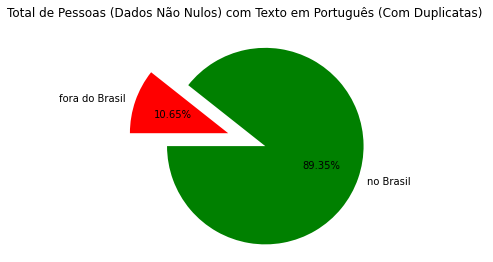

In [ ]:
labels = 'no Brasil', 'fora do Brasil'
sections = [contador_no_br, contador_fora_br]
colors = ['g', 'r']

plt.pie(sections, labels=labels, colors=colors,
        startangle=180,
        explode = (0, 0.4),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Total de Pessoas (Dados Não Nulos) com Texto em Português (Com Duplicatas) \n')
plt.show()

## Remoção de Duplicatas

### Organização por ordem alfabética de apelido

In [ ]:
# total de dados para se trabalhar
num_dataset_filtrado = len(dados_completos_sem_nulo)


In [ ]:

# arrays para montar dataset
dic_texto = [] # array para conter a coluna texto
dic_lugar = [] # array para conter a coluna lugar
dic_pais = [] # array para conter a coluna pais
dic_data = [] # array para conter a coluna data
dic_apelido = [] # array para coluna apelido
dic_latitude = [] # array para conter a coluna latitude
dic_longitude = [] # array para conter a coluna longitude
dic_idioma = [] # array para conter a coluna idioma
dic_sigla = [] # array para conter a coluna sigla
dic_resumo = [] # array para conter a nova coluna resumo


for i in range(num_dataset_filtrado):
  # formatando o texto obtido
  texto_filtrado = dados_completos_sem_nulo.iloc[i]['texto'].lower()
  dic_texto.append(texto_filtrado)
  # adicionando os demais dados
  # Os dados foram separados em arrays para facilitar a ordenação
  dic_lugar.append(dados_completos_sem_nulo.iloc[i]['lugar'].lower())
  dic_pais.append(dados_completos_sem_nulo.iloc[i]['pais'].lower())
  dic_latitude.append(dados_completos_sem_nulo.iloc[i]['latitude'])
  dic_longitude.append(dados_completos_sem_nulo.iloc[i]['longitude'])
  dic_sigla.append(dados_completos_sem_nulo.iloc[i]['sigla'])
  dic_idioma.append(dados_completos_sem_nulo.iloc[i]['idioma'].lower())
  dic_data.append(dados_completos_sem_nulo.iloc[i]['data'])
  # nova coluna resumo
  texto_resumido = texto_filtrado.translate({ord(c): None for c in string.whitespace})
  dic_resumo.append(texto_resumido[0:20])
  # um marcador foi adicionado ao apelido para filtar itens no array
  dic_apelido.append(dados_completos_sem_nulo.iloc[i]['apelido'].lower() + "+" + str(i))

# um sort foi feito com base no apelido para a reordenação
dic_apelido.sort()


In [ ]:
# montagem do dicionário organizado pela ordem de apelido
dicionario_apelido_ordem_alfabetica = []
contador_de_erros = 0 # informacional 

for i in range(len(dic_apelido)):
  posicao = dic_apelido[i].find("+")  #filtro o comeco da posicao do marcador
  posicao_maxima = len(dic_apelido[i]) # filtro o fim da posicao do marcador
  apelido_formatado = dic_apelido[i][0:posicao] # filtro o marcador
  try:
    #tendo o marcador em maos transformo de string para inteiro
    posicao_formatado = int(dic_apelido[i][posicao+1:posicao_maxima])
    try:
      # utilizo o inteiro para achar o valor e montar o dicionario
      data_list = {'id': str(i), # valor posicao para uso futuro (facilitador)
                   'apelido':apelido_formatado,
                   'texto':dic_texto[posicao_formatado],
                   'data':dic_data[posicao_formatado],
                   'idioma':dic_idioma[posicao_formatado],
                   'pais':dic_pais[posicao_formatado],
                   'latitude':dic_latitude[posicao_formatado],
                   'longitude':dic_longitude[posicao_formatado],
                   'sigla':dic_sigla[posicao_formatado],
                   'lugar':dic_lugar[posicao_formatado],
                   'resumo':dic_resumo[posicao_formatado]}
      dicionario_apelido_ordem_alfabetica.append(data_list)
    except IndexError:
      print("index error em ",posicao_formatado,posicao)
  except (ValueError):
    contador_de_erros +=1
    print(str(contador_de_erros),dic_texto[i])

In [ ]:
pd.DataFrame(dicionario_apelido_ordem_alfabetica).tail()

,id,apelido,texto,data,idioma,pais,latitude,longitude,sigla,lugar,resumo
8702,8702,zuaohenrique,o papa francisco rezando sozinho na imensa pra...,2020-03-27 22:59:12,pt,vatican city,12.457018,41.902473,VA,vatican city,opapafranciscorezand
8703,8703,zulublackmc,proteção e primordial dentro e fora dos coleti...,2020-04-17 06:00:57,pt,brazil,-43.197500,-22.908000,BR,rio de janeiro,proteçãoeprimordiald
8704,8704,zuzamanoel,no combate a corona vírus; (covid 19). \nd' ly...,2020-04-08 18:25:15,pt,brazil,-46.549276,-23.469858,BR,guarulhos,nocombateacoronavíru
8705,8705,zuzamanoel,no combate a corona vírus; (covid 19). \nd' ly...,2020-04-08 18:23:43,pt,brazil,-46.549276,-23.469858,BR,guarulhos,nocombateacoronavíru
8706,8706,zuzamanoel,no combate a corona vírus; (covid 19). \nd' ly...,2020-04-08 18:19:57,pt,brazil,-46.549276,-23.469858,BR,guarulhos,nocombateacoronavíru


Através da ordem alfabetica se torna vísivel as duplicatas e em seguida, ao observar suas datas, foi possível constantar uma serie de regras para definir o que são as duplicatas .

### Regras que define um texto repetido


1.   Mesmo apelido que postou o mesmo texto: as repostagens.
2.   Diferentes apelidos que postou o mesmo texto: as repostagens de sites de notícias ou de links alheios.



### Download do arquivo por ordem alfabética de apelido


In [ ]:
#@title Baixar dados não nulos ordenado por apelido em .csv  { form-width: "45%" }


gerar_download = True #@param {type:"boolean"}
dic_para_download = {}

if(gerar_download):
  for di in dicionario_apelido_ordem_alfabetica:
    dic_para_download[di['id']]={}
    for k in di.keys():
      if k =='id': continue
      dic_para_download[di['id']][k]=di[k]
      
  with open('DadosNaoNuloFrmtApelido.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                     'idioma','pais','latitude','longitude','sigla','lugar','resumo'])
    for key, value in dic_para_download.items():
      writer.writerow([key, value['apelido'], value['data'], 
                       value['texto'], value['idioma'],
                       value['pais'], value['latitude'],
                       value['longitude'], value['sigla'],
                       value['lugar'],value['resumo'] ])

## Os Textos Repetidos

In [ ]:
#@title Usar dados do drive
usar_drive = True #@param {type:"boolean"}
url_para_usar = "https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosNaoNuloFrmtApelido%20(1).csv"
if (usar_drive):
  url_para_usar = "/content/DadosNaoNuloFrmtApelido.csv"

csv_para_usar = pd.read_csv(url_para_usar)
textos_repetidos = csv_para_usar.filter(items=['resumo','apelido'])
textos_repetidos.groupby('resumo').count().sort_values(by='resumo',ascending=True) #tentando filtrar e ordenar por quantidade

,apelido
resumo,
"""...cômicooutrágico?",1
"""...oamoréapandemiaq",1
"""acorageméaprimeirad",1
"""agentenãoéoquequers",1
"""ah,outracoisaimport",1
...,...
🦠passandoparadizerqu,1
🦠📈dos68casosconfirma,1
"🧂🥃🍋.sim,sóshotdetequ",1


In [ ]:
csv_para_usar.drop_duplicates(subset="resumo",keep="last")

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,02e9b7e20f9844a,2020-05-14 23:08:54,a imagem fala por si....\n.\n.\n.\n.\n.\n.\n.\...,pt,brazil,-46.633300,-23.550000,BR,sao paulo,aimagemfalaporsi....
1,1,10_pags,2020-03-26 22:29:33,visando ajudar neste momento de distanciamento...,pt,brazil,-42.933300,-21.116700,BR,ubá,visandoajudarnestemo
2,2,10bigshaq,2020-05-08 23:14:14,#selfie em dias de #pandemia sai um pouco comp...,pt,brazil,-46.633300,-23.550000,BR,sao paulo,#selfieemdiasde#pand
3,3,125kal,2020-05-19 15:52:36,cuide-se pois muitas pessoas precisa de vc. sa...,pt,brazil,-46.866475,-23.511894,BR,barueri,cuide-sepoismuitaspe
4,4,13maiconmoreira,2020-03-22 12:06:21,"parabéns meu amor!\nhoje, enquanto muitos estã...",pt,brazil,-54.111529,-31.326112,BR,bagé,parabénsmeuamor!hoje
...,...,...,...,...,...,...,...,...,...,...,...
8700,8700,zluizcandeeiro,2020-03-29 17:16:38,"os covardes agridem, mas os ofendidos serão se...",pt,brazil,-37.125210,-7.892120,BR,monteiro,"oscovardesagridem,ma"
8701,8701,zso1t,2020-04-02 23:39:30,#stjude #patronsaintoflostcauses #religion #go...,pt,canada,-79.387200,43.648000,CA,toronto,#stjude#patronsainto
8702,8702,zuaohenrique,2020-03-27 22:59:12,o papa francisco rezando sozinho na imensa pra...,pt,vatican city,12.457018,41.902473,VA,vatican city,opapafranciscorezand
8703,8703,zulublackmc,2020-04-17 06:00:57,proteção e primordial dentro e fora dos coleti...,pt,brazil,-43.197500,-22.908000,BR,rio de janeiro,proteçãoeprimordiald


## Ordem de publicação

In [ ]:
num_dataset_filtrado = len(csv_para_usar)

# arrays para montar dataset
dic_texto = [] # array para conter a coluna texto
dic_lugar = [] # array para conter a coluna lugar
dic_pais = [] # array para conter a coluna pais
dic_data = [] # array para conter a coluna data
dic_apelido = [] # array para coluna apelido
dic_latitude = [] # array para conter a coluna latitude
dic_longitude = [] # array para conter a coluna longitude
dic_idioma = [] # array para conter a coluna idioma
dic_sigla = [] # array para conter a coluna sigla
dic_resumo = [] # array para conter a nova coluna resumo


for i in range(num_dataset_filtrado):
  # formatando o texto obtido
  texto_filtrado = csv_para_usar.iloc[i]['texto'].lower()
  dic_texto.append(texto_filtrado)
  # adicionando os demais dados
  # Os dados foram separados em arrays para facilitar a ordenação
  dic_lugar.append(csv_para_usar.iloc[i]['lugar'].lower())
  dic_pais.append(csv_para_usar.iloc[i]['pais'].lower())
  dic_latitude.append(csv_para_usar.iloc[i]['latitude'])
  dic_longitude.append(csv_para_usar.iloc[i]['longitude'])
  dic_sigla.append(csv_para_usar.iloc[i]['sigla'])
  dic_idioma.append(csv_para_usar.iloc[i]['idioma'].lower())
  dic_apelido.append(csv_para_usar.iloc[i]['apelido'])
  texto_resumido = texto_filtrado.translate({ord(c): None for c in string.whitespace})
  dic_resumo.append(texto_resumido[0:20])
  # um marcador foi adicionado ao apelido para filtar itens no array
  dic_data.append(csv_para_usar.iloc[i]['data'].lower() + "+" + str(i))

# um sort foi feito com base no apelido para a reordenação
dic_data.sort()

# montagem do dicionário organizado pela ordem de apelido
dicionario_ordem_data = []
contador_de_erros = 0 # informacional 

for i in range(len(dic_data)):
  posicao = dic_data[i].find("+")  #filtro o comeco da posicao do marcador
  posicao_maxima = len(dic_data[i]) # filtro o fim da posicao do marcador
  data_formatado = dic_data[i][0:posicao] # filtro o marcador
  try:
    #tendo o marcador em maos transformo de string para inteiro
    posicao_formatado = int(dic_data[i][posicao+1:posicao_maxima])
    try:
      # utilizo o inteiro para achar o valor e montar o dicionario
      data_list = {'id': str(i), # valor posicao para uso futuro (facilitador)
                   'apelido':dic_apelido[posicao_formatado],
                   'texto':dic_texto[posicao_formatado],
                   'data':data_formatado,
                   'idioma':dic_idioma[posicao_formatado],
                   'pais':dic_pais[posicao_formatado],
                   'latitude':dic_latitude[posicao_formatado],
                   'longitude':dic_longitude[posicao_formatado],
                   'sigla':dic_sigla[posicao_formatado],
                   'lugar':dic_lugar[posicao_formatado],
                   'resumo':dic_resumo[posicao_formatado]}
      dicionario_ordem_data.append(data_list)
    except IndexError:
      print("index error em ",posicao_formatado,posicao)
  except (ValueError):
    contador_de_erros +=1
    print(str(contador_de_erros),dic_texto[i])

pd.DataFrame(dicionario_ordem_data).tail()

,id,apelido,texto,data,idioma,pais,latitude,longitude,sigla,lugar,resumo
8702,8702,efraimfilho,vitória!! odontologia foi incluída na relação ...,2020-06-30 23:41:11,pt,brazil,-47.864913,-15.801396,BR,brasília,vitória!!odontologia
8703,8703,luciana075,deus sabe de todas as coisas... #boanoite #deu...,2020-06-30 23:44:26,pt,brazil,-56.096900,-15.595800,BR,cuiabá,deussabedetodasascoi
8704,8704,ligiagismara,"eu treino,porque algo que me deixa completamen...",2020-06-30 23:53:01,pt,brazil,-38.602466,-4.490472,BR,ocara,"eutreino,porquealgoq"
8705,8705,ricardofalchett,#façasuaparte\n#coronavirus \n#covid19 em são ...,2020-06-30 23:53:04,pt,brazil,-49.379400,-20.810200,BR,são josé do rio preto,#façasuaparte#corona
8706,8706,eusigo90fm,boletim epidemiológico!!!\n\nribas do rio pard...,2020-06-30 23:57:22,pt,brazil,-53.764840,-20.452260,BR,ribas do rio pardo,boletimepidemiológic


In [ ]:
#@title Baixar dados não nulos ordenado por data em .csv  { form-width: "45%" }


gerar_download = True #@param {type:"boolean"}
dic_para_download = {}

if(gerar_download):
  for di in dicionario_ordem_data:
    dic_para_download[di['id']]={}
    for k in di.keys():
      if k =='id': continue
      dic_para_download[di['id']][k]=di[k]
      
  with open('DadosOrdemData.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                     'idioma','pais','latitude','longitude','sigla','lugar','resumo'])
    for key, value in dic_para_download.items():
      writer.writerow([key, value['apelido'], value['data'], 
                       value['texto'], value['idioma'],
                       value['pais'], value['latitude'],
                       value['longitude'], value['sigla'],
                       value['lugar'],value['resumo'] ])

De 1658825 sobraram 8707 linhas 



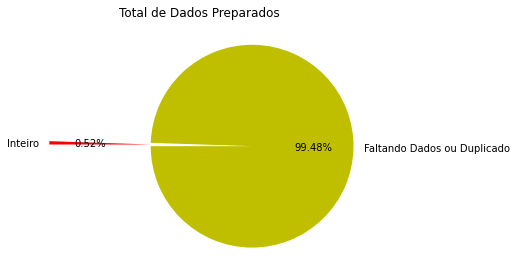

In [ ]:
#@title Exibir Resultado Filtrado  { form-width: "45%" }
usar_drive = True #@param {type:"boolean"}

url_para_usar = "https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv"

if (usar_drive):
  url_para_usar = "/content/DadosOrdemData.csv"

exibir_resultado = True #@param {type:"boolean"}
if (exibir_resultado):
  dados_ordem_data = pd.read_csv(url_para_usar)
  dados_completos = pd.read_csv("/content/drive/My Drive/dados-curso-completo.csv")

  num_total = len(dados_completos)
  num_or_data = len(dados_ordem_data)
  num_cortado = num_total - num_or_data
  print("De",num_total,"sobraram",num_or_data,"linhas \n")

  labels = 'Faltando Dados ou Duplicado', 'Inteiro'
  sections = [num_cortado, num_or_data]
  colors = ['y', 'r']

  plt.pie(sections, labels=labels, colors=colors,
          startangle=180,
          explode = (0, 1),
          autopct = '%1.2f%%')

  plt.axis('equal') # Try commenting this out.
  plt.title('Total de Dados Preparados \n')
  plt.show()


## Script de Filtro de Dados

### Método da Filtragem

In [ ]:

def filtrar_e_exportar(csv_usado,formatar,palavra,exportar,nome):      
  obj_para_download = []
  dic_para_download = {}

  # ----------------------
  # FILTRANDO DADOS DOWNLOAD
  # ----------------------
  num_dataset_filtrado = len(csv_usado)
  ids_filtrados = []
  num_filtrados = 0
  for i in range(num_dataset_filtrado):
    filtro1 = csv_usado.iloc[i]['texto'].lower()
    filtro2 = filtro1.replace("?"," ? ") # deixar a interrogacao mais visivel
    filtro3 = filtro2.replace("#"," ") # remove hashtags
    filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
    filtro5 = filtro4.replace("í","i") # remove quebra de linha
    palavras = filtro5.split(' ') # forma array
    adicionado = False

    if (i>=0):
    # if (formatar):
    #   edit_filtro1 = filtro1.translate({ord(c): None for c in string.whitespace})
    #   filtro1 = edit_filtro1
      for d in range(len(palavras)):
        if (d==0):
          adicionado = False #debug
        if (palavras[d]==palavra):
          # print('achou valor')
          num_filtrados +=1
          if (adicionado == False):
            adicionado = True
            ids_filtrados.append(csv_usado.iloc[i]['posicao'])
      # try:
      #   valor = filtro1.find(palavra)
      #   if (valor!=-1):
      #     num_filtrados +=1
      #     ids_filtrados.append(i)
      # except:
      #   print("erro")
      if (i == num_dataset_filtrado-1):
        print("\n Filtragem da palavra",palavra,"terminou",
              "\n Foram filtrados um total de", len(ids_filtrados), "itens",
              "\n sendo eles",ids_filtrados)
      
  # ----------------------
  # FORMATAR DOWNLOAD
  # ----------------------

  for i in range(len(ids_filtrados)):
      posicao_formatado = ids_filtrados[i]
      data_list = {'id': str(i),
                  'apelido':csv_usado.iloc[posicao_formatado]['apelido'],
                  'texto':csv_usado.iloc[posicao_formatado]['texto'],
                  'data':csv_usado.iloc[posicao_formatado]['data'],
                  'idioma':csv_usado.iloc[posicao_formatado]['idioma'],
                  'pais':csv_usado.iloc[posicao_formatado]['pais'],
                  'latitude':csv_usado.iloc[posicao_formatado]['latitude'],
                  'longitude':csv_usado.iloc[posicao_formatado]['longitude'],
                  'sigla':csv_usado.iloc[posicao_formatado]['sigla'],
                  'lugar':csv_usado.iloc[posicao_formatado]['lugar']}
      obj_para_download.append(data_list)

  # ----------------------
  # EXPORTANDO CSV
  # ----------------------

  gerarDownload = exportar
  nome_csv = "datasheet_" + str(palavra)
  if(nome != ""):
    nome_csv = nome_do_arquivo

  if(gerarDownload):
    for di in obj_para_download:
      dic_para_download[di['id']]={}
      for k in di.keys():
        if k =='id': continue
        dic_para_download[di['id']][k]=di[k]
        
    with open( nome_csv +'.csv', 'w') as csv_file:  
      writer = csv.writer(csv_file)
      writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                      'idioma','pais','latitude','longitude','sigla',
                      'lugar','resumo'])
      for key, value in dic_para_download.items():
        writer.writerow([key, value['apelido'], value['data'], 
                        value['texto'], value['idioma'],
                        value['pais'], value['latitude'],
                        value['longitude'], value['sigla'],
                        value['lugar'] ])
        

### Uso do Método de Filtragem

In [ ]:
#@title Opções de Filtragem { form-width: "70%" }
qual_palavra = "italia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar: pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra italia terminou 
 Foram filtrados um total de 37 itens 
 sendo eles [592, 593, 594, 596, 597, 599, 600, 601, 602, 603, 605, 606, 607, 609, 610, 1626, 1830, 4077, 4509, 5679, 5743, 5744, 5745, 6256, 7441, 7442, 7508, 7509, 7511, 7672, 7673, 7674, 7683, 8460, 8461, 8548, 8598]


# Interpretação de Dados


## Primeira Conclusão da Interpretação




In [ ]:
dados_completos = pd.read_csv("/content/drive/My Drive/dados-curso-completo.csv")
numero_lugares_unicos_completo = len(dados_completos.filter(items=['lugar','apelido']).groupby('lugar'))
numero_contas_unicas_completo = len(dados_completos.filter(items=['lugar','apelido']).groupby('apelido'))
numero_msg_unicas_completo = len(dados_completos.filter(items=['texto','apelido']).groupby('texto'))
numero_paises_unicos_completo = len(dados_completos.filter(items=['pais','apelido']).groupby('pais'))
numero_locacoes_unicos_completo = len(dados_completos.filter(items=['latitude','apelido']).groupby('apelido'))
numero_idioma_unicos_completo = len(dados_completos.filter(items=['idioma','apelido']).groupby('idioma'))

print("\n De",numero_contas_unicas_completo,"contas totais",
      "\n ha",numero_msg_unicas_completo,"mensagens não repetidas",
      "\n de",numero_idioma_unicos_completo,"idiomas diferentes",
      "\n de",numero_paises_unicos_completo,"paises",
      "\n e",numero_lugares_unicos_completo,"cidades",
      "\n e de",numero_locacoes_unicos_completo,"latitudes diferentes")


 De 774516 contas totais 
 ha 1653599 mensagens não repetidas 
 de 59 idiomas diferentes 
 de 121 paises 
 e 4500 cidades 
 e de 774516 latitudes diferentes


Através do uso da biblioteca Pandas foi possível perceber que do dataset fornecido pelo professor existem 774516 contas totais com um total de 1653599 mensagens não repetidas de 59 idiomas diferentes vindas de 121 paises, totalizando 4500 cidades e 774516 latitudes diferentes


In [ ]:
csv_para_usar = pd.read_csv("/content/DadosOrdemData.csv")
numero_lugares_unicos = len(csv_para_usar.filter(items=['lugar','apelido']).groupby('lugar'))
numero_contas_unicas = len(csv_para_usar.filter(items=['lugar','apelido']).groupby('apelido'))
numero_msg_unicas = len(csv_para_usar.filter(items=['resumo','apelido']).groupby('resumo'))
numero_paises_unicos = len(csv_para_usar.filter(items=['pais','apelido']).groupby('pais'))
numero_locacoes_unicos = len(csv_para_usar.filter(items=['latitude','apelido']).groupby('apelido'))
numero_idioma_unicos = len(csv_para_usar.filter(items=['idioma','apelido']).groupby('idioma'))

print("\n De",numero_contas_unicas,"contas totais",
      "\n ha",numero_msg_unicas,"mensagens não repetidas",
      "\n de",numero_idioma_unicos,"idiomas diferentes",
      "\n de",numero_paises_unicos,"paises",
      "\n e",numero_lugares_unicos,"cidades",
      "\n e de",numero_locacoes_unicos,"latitudes diferentes")


 De 4593 contas totais 
 ha 7882 mensagens não repetidas 
 de 16 idiomas diferentes 
 de 57 paises 
 e 1112 cidades 
 e de 4593 latitudes diferentes


A filtragem de dados não foi perfeita, pois com a filtragem foi descoberto que de 4593 contas totais houveram 7882 mensagens não repetidas de **16 idiomas** diferentes vindas de 57 paises, num total de 1112 cidades e de 4593 latitudes diferentes. Enquanto o esperado era ter apenas um 1 idioma no total.

## Primeira Correção: remoção de idiomas não "pt"


In [ ]:
csv_para_filtrar = pd.read_csv("/content/DadosOrdemData.csv")

# Fonte: https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a
# Get indexes where name column doesn't have value john
indexNames = csv_para_filtrar[~(csv_para_filtrar['idioma'] == 'pt')].index 
# Delete these row indexes from dataFrame
csv_para_filtrar.drop(indexNames , inplace=True)

numero_lugares_unicos_filtrado = len(csv_para_filtrar.filter(items=['lugar','apelido']).groupby('lugar'))
numero_contas_unicas_filtrado = len(csv_para_filtrar.filter(items=['lugar','apelido']).groupby('apelido'))
numero_msg_unicas_filtrado = len(csv_para_filtrar.filter(items=['resumo','apelido']).groupby('resumo'))
numero_paises_unicos_filtrado = len(csv_para_filtrar.filter(items=['pais','apelido']).groupby('pais'))
numero_locacoes_unicos_filtrado = len(csv_para_filtrar.filter(items=['latitude','apelido']).groupby('apelido'))
numero_idioma_unicos_filtrado = len(csv_para_filtrar.filter(items=['idioma','apelido']).groupby('idioma'))

print("\n De",numero_contas_unicas_filtrado,"contas totais",
      "\n ha",numero_msg_unicas_filtrado,"mensagens não repetidas",
      "\n de",numero_idioma_unicos_filtrado,"idiomas diferentes",
      "\n de",numero_paises_unicos_filtrado,"paises",
      "\n e",numero_lugares_unicos_filtrado,"cidades",
      "\n e de",numero_locacoes_unicos_filtrado,"latitudes diferentes")




 De 4503 contas totais 
 ha 7777 mensagens não repetidas 
 de 1 idiomas diferentes 
 de 53 paises 
 e 1052 cidades 
 e de 4503 latitudes diferentes


#### Dataframe somente idioma em pt

In [ ]:
csv_para_filtrar = pd.read_csv("/content/DadosOrdemData.csv")

# Fonte: https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a
# Get indexes where name column doesn't have value john
indexNames = csv_para_filtrar[~(csv_para_filtrar['idioma'] == 'pt')].index 
# Delete these row indexes from dataFrame
csv_para_filtrar.drop(indexNames , inplace=True)

pd.DataFrame(csv_para_filtrar)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,santiagosjacome,2020-01-07 17:10:48,#postagem3\n#janeirobranco \n*dê atenção a que...,pt,brazil,-37.275100,-7.019200,BR,patos,#postagem3#janeirobr
1,1,confrariaideias,2020-01-08 03:13:50,"larp ""quarentena 64"", sesc taubaté, 2019. #lar...",pt,brazil,-45.567985,-23.004842,BR,taubaté,"larp""quarentena64"",s"
2,2,tsfradio,2020-01-09 15:49:33,investigação identifica doença respiratória ch...,pt,portugal,-9.099043,38.747518,PT,lisbon,investigaçãoidentifi
3,3,pulmaosa,2020-01-09 23:12:23,#tipoftheday in #pneumologia #📰 sobre o surto...,pt,people's republic of china,114.350150,30.525024,CN,hubei,#tipofthedayin#pneum
4,4,fcpdiass,2020-01-14 01:01:54,o isolamento social é um problema cada vez mai...,pt,brazil,-38.521809,-13.005499,BR,salvador,oisolamentosocialéum
...,...,...,...,...,...,...,...,...,...,...,...
8702,8702,efraimfilho,2020-06-30 23:41:11,vitória!! odontologia foi incluída na relação ...,pt,brazil,-47.864913,-15.801396,BR,brasília,vitória!!odontologia
8703,8703,luciana075,2020-06-30 23:44:26,deus sabe de todas as coisas... #boanoite #deu...,pt,brazil,-56.096900,-15.595800,BR,cuiabá,deussabedetodasascoi
8704,8704,ligiagismara,2020-06-30 23:53:01,"eu treino,porque algo que me deixa completamen...",pt,brazil,-38.602466,-4.490472,BR,ocara,"eutreino,porquealgoq"
8705,8705,ricardofalchett,2020-06-30 23:53:04,#façasuaparte\n#coronavirus \n#covid19 em são ...,pt,brazil,-49.379400,-20.810200,BR,são josé do rio preto,#façasuaparte#corona


#### Dataframe somente idioma não pt


In [ ]:
csv_para_filtrar = pd.read_csv("/content/DadosOrdemData.csv")

# Fonte: https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a
# Get indexes where name column doesn't have value john
indexNames = csv_para_filtrar[~(csv_para_filtrar['idioma'] != 'pt')].index 
# Delete these row indexes from dataFrame
csv_para_filtrar.drop(indexNames , inplace=True)

pd.DataFrame(csv_para_filtrar)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
41,41,shutterblaster,2020-01-27 09:12:17,selfie 😐 @ mubarak village beach resort https:...,in,pakistan,67.010000,24.860000,PK,karachi,selfie😐@mubarakvilla
121,121,junichikawa82,2020-02-05 12:59:50,#stopracism #becompassionate #wecanfightthefea...,it,italy,12.478093,41.886817,IT,rome,#stopracism#becompas
204,204,mittens2002,2020-02-21 10:34:40,australia’s first dedicated e-sports bar @ gg ...,en,australia,144.961030,-37.816360,AU,melbourne,australia’sfirstdedi
304,304,mario_spn,2020-02-29 18:32:43,so cosa fare quando non voglio pensare al pegg...,it,italy,13.362625,38.114992,IT,palermo,socosafarequandononv
367,367,hectorpobletec,2020-03-04 23:50:25,20:50 en san ramón fuego en pasto y/o basura (...,es,chile,-70.635100,-33.551100,CL,san ramón,20:50ensanramónfuego
...,...,...,...,...,...,...,...,...,...,...,...
8359,8359,andye_souza,2020-06-24 00:49:50,fato....\n#sororidade #dororidade #vaipassar #...,it,brazil,-35.209500,-5.800800,BR,natal,fato....#sororidade#
8461,8461,ricordidiroma,2020-06-27 11:19:39,foro\n#ricordidiroma !!! #turistando #turismo ...,en,italy,12.454340,41.899399,IT,rome,foro#ricordidiroma!!
8548,8548,ricordidiroma,2020-06-29 10:21:16,foro\n#ricordidiroma !!! #turistando #turismo ...,en,italy,12.454340,41.899399,IT,rome,foro#ricordidiroma!!
8590,8590,pablordr,2020-06-30 02:37:46,movimente-se\n.\n.\n. \n.\n.\n#acredite\n#educ...,es,brazil,-46.633300,-23.550000,BR,sao paulo,movimente-se.....#ac


Feita a correção, através da análise dos idiomas em português é percepítvel que o dado usado se encontra igualmente falho. Existem frases em espanhol ou italiano que por serem de escrita semelhante foram categorizados como em português.

## Filtrando Perguntas

### Lógica utilizada

In [ ]:
# Tendo um datasheet escolhido
csv_utilizado = pd.read_csv("/content/DadosOrdemData.csv")
# É simplificado o texto colocando tudo em caixa baixa
filtro1 = csv_utilizado.iloc[48]['texto'].lower()
# Para então buscado a interrogação e adicionando espaços ao redor dela
filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
# As hashtags são removidas e substituídas por espaços
filtro3 = filtro2.replace("#"," ") # remove hashtags
# as quebras de linhas são substituidas por espaço
filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
# a acentuação do i é removido para evitar conflitos como em vírus x virus
filtro5 = filtro4.replace("í","i") # remove quebra de linha
# e a string é transformada em um array de caracteres tendo espaço como divisor
palavras = filtro5.split(' ')

# Essa lógica desenvolvida foi então colocada dentro do método de filtragem utilizado
print(palavras)


['acabo', 'de', 'saber', ',', '', 'o', 'primeiro', 'caso', 'de', 'coronavirus', 'no', 'estado', 'do', 'ceará.🤒😷', 'em', 'caucaia,', 'ceara,', 'brazil', 'https://t.co/dctnx8kugt']


In [ ]:
#@title Opções de Filtragem: prefeito { form-width: "70%" }
qual_palavra = "coronavirus" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_prefeito" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosNaoNuloFrmtApelido.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra coronavirus terminou 
 Foram filtrados um total de 1327 itens 
 sendo eles [2, 28, 33, 42, 62, 63, 68, 91, 108, 111, 121, 128, 129, 132, 137, 147, 162, 165, 179, 180, 184, 186, 187, 199, 208, 210, 215, 230, 238, 267, 268, 297, 302, 303, 317, 318, 323, 325, 328, 330, 331, 338, 342, 343, 344, 345, 350, 354, 359, 363, 365, 378, 400, 432, 449, 477, 481, 482, 484, 493, 496, 497, 522, 525, 529, 530, 533, 550, 565, 569, 577, 591, 595, 597, 598, 602, 626, 641, 642, 673, 674, 694, 700, 710, 713, 715, 722, 726, 743, 746, 751, 752, 753, 754, 763, 775, 776, 813, 828, 833, 853, 854, 871, 887, 892, 894, 912, 919, 921, 922, 926, 930, 934, 935, 940, 946, 955, 957, 958, 961, 963, 985, 988, 998, 1007, 1028, 1030, 1031, 1034, 1040, 1087, 1102, 1104, 1107, 1114, 1117, 1119, 1126, 1131, 1137, 1144, 1145, 1154, 1155, 1167, 1171, 1175, 1191, 1197, 1200, 1211, 1221, 1231, 1240, 1248, 1250, 1256, 1265, 1272, 1286, 1289, 1295, 1301, 1311, 1321, 1334, 1338, 1365, 1381, 1394, 1397, 1403, 14

In [ ]:
#@title Opções de Filtragem: Perguntas { form-width: "70%" }
qual_palavra = "?" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_interrogacao" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar: pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ? terminou 
 Foram filtrados um total de 592 itens 
 sendo eles [5, 13, 54, 73, 82, 92, 102, 105, 109, 117, 124, 137, 173, 193, 196, 252, 259, 311, 350, 397, 468, 494, 497, 521, 541, 565, 566, 579, 620, 622, 630, 663, 710, 715, 735, 814, 856, 879, 959, 1023, 1046, 1056, 1124, 1149, 1150, 1172, 1181, 1194, 1245, 1302, 1314, 1316, 1389, 1392, 1411, 1413, 1417, 1424, 1426, 1442, 1448, 1457, 1471, 1476, 1488, 1496, 1498, 1508, 1552, 1560, 1565, 1595, 1598, 1629, 1636, 1643, 1713, 1716, 1721, 1735, 1754, 1774, 1788, 1795, 1802, 1820, 1822, 1826, 1851, 1869, 1870, 1881, 1891, 1893, 1895, 1913, 1921, 1932, 1933, 1950, 1971, 2015, 2020, 2022, 2045, 2066, 2067, 2075, 2076, 2105, 2114, 2129, 2135, 2139, 2157, 2160, 2162, 2165, 2172, 2182, 2195, 2226, 2234, 2298, 2300, 2312, 2397, 2412, 2423, 2434, 2446, 2485, 2513, 2528, 2539, 2543, 2552, 2557, 2580, 2588, 2599, 2609, 2621, 2622, 2629, 2639, 2676, 2679, 2683, 2700, 2716, 2754, 2770, 2772, 2782, 2787, 2816, 2837, 2865, 2917

In [ ]:
csv_interrogacao = pd.read_csv("/content/pesquisa_interrogacao.csv")
pd.DataFrame(csv_interrogacao)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,renataluanut,2020-01-20 13:15:57,por que será que focar no resultado final pode...,pt,brazil,-38.476700,-12.974700,BR,salvador,NaN
1,1,ac_q,2020-01-21 23:36:11,coronavirus e vc sem plano de saúde? proteção!...,pt,brazil,-34.925700,-8.060500,BR,recife,NaN
2,2,fabiorochapoeta,2020-01-29 22:28:29,como pode ser mais divertido?😂😂😂😂\n.\n.\n.\n.\...,pt,brazil,-43.468900,-23.017800,BR,rio de janeiro,NaN
3,3,aleksandro_,2020-01-31 20:44:53,quem vence ??? \n#coronavirus #kkkkkk em diade...,pt,brazil,-46.610600,-23.686100,BR,diadema,NaN
4,4,tracosdenanquim,2020-02-01 23:38:37,o presidente pode tbm editar uma mp e regulame...,pt,brazil,-47.955884,-15.823753,BR,brasília,NaN
...,...,...,...,...,...,...,...,...,...,...,...
587,587,uberfashion,2020-06-30 19:16:58,"2020 seu lindo? ⁣\n⁣\napenas marque seu amigo,...",pt,brazil,-42.533300,-22.266700,BR,nova friburgo,NaN
588,588,pimenta_cute,2020-06-30 21:07:52,o que vc está fazendo na quarentena?!\n.\n.\n....,pt,brazil,-49.270700,-16.686900,BR,goiânia,NaN
589,589,armandopugliesi,2020-06-30 22:17:48,e aí? tá se alimentando saudável na quarentena...,pt,brazil,-34.903626,-8.127848,BR,recife,NaN
590,590,aposentadosel,2020-06-30 22:40:51,e no café da tarde tivemos....\n\nbolinho de c...,pt,brazil,-47.333800,-22.739900,BR,americana,NaN


## Quantitativo de Palavras com "?"

In [ ]:
#@title Mapa Calor
url_para_uso = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

In [ ]:
#@title Opções de Filtragem: presidente { form-width: "70%" }
qual_palavra = "presidente" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_presidente" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra presidente terminou 
 Foram filtrados um total de 2 itens 
 sendo eles [4, 132]


In [ ]:
#@title Opções de Filtragem: governador { form-width: "70%" }
qual_palavra = "governador" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_governador" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra governador terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: prefeito { form-width: "70%" }
qual_palavra = "prefeito" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_prefeito" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra prefeito terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [345]


In [ ]:
#@title Opções de Filtragem: morte { form-width: "70%" }
qual_palavra = "morte" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_morte" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra morte terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: morrer { form-width: "70%" }
qual_palavra = "morrer" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_morrer" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra morrer terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [132]


In [ ]:
#@title Opções de Filtragem: hospital { form-width: "70%" }
qual_palavra = "hospital" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_hospital" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra hospital terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: ministro { form-width: "70%" }
qual_palavra = "ministro" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_ministro" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ministro terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [135]


In [ ]:
#@title Opções de Filtragem: china { form-width: "70%" }
qual_palavra = "china" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "inter_china" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra china terminou 
 Foram filtrados um total de 4 itens 
 sendo eles [4, 8, 286, 551]


In [ ]:
#@title Opções de Filtragem: chineses { form-width: "70%" }
qual_palavra = "chineses" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_chineses" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra chineses terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [48]


In [ ]:
#@title Opções de Filtragem: bolsonaro { form-width: "70%" }
qual_palavra = "bolsonaro" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra bolsonaro terminou 
 Foram filtrados um total de 4 itens 
 sendo eles [336, 354, 435, 532]


In [ ]:
#@title Opções de Filtragem: vírus { form-width: "70%" }
qual_palavra = "\"virus\"" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_virus" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra "virus" terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: gripezinha { form-width: "70%" }
qual_palavra = "gripezinha" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_gripezinha" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra gripezinha terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: coronavirus { form-width: "70%" }
qual_palavra = "coronavirus" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_coronavirus" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra coronavirus terminou 
 Foram filtrados um total de 75 itens 
 sendo eles [1, 3, 8, 9, 10, 11, 12, 13, 15, 20, 30, 37, 44, 47, 54, 63, 64, 69, 72, 73, 78, 85, 99, 100, 103, 123, 127, 129, 131, 146, 151, 152, 153, 156, 179, 180, 186, 197, 198, 201, 205, 207, 212, 213, 214, 221, 234, 235, 239, 245, 255, 269, 270, 279, 309, 314, 319, 332, 338, 344, 345, 350, 366, 378, 409, 452, 494, 496, 505, 509, 526, 540, 549, 569, 571]


In [ ]:
#@title Opções de Filtragem: pandemia { form-width: "70%" }
qual_palavra = "pandemia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_pandemia" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra pandemia terminou 
 Foram filtrados um total de 58 itens 
 sendo eles [14, 25, 100, 101, 102, 103, 104, 133, 149, 150, 157, 181, 201, 253, 260, 282, 283, 288, 290, 304, 313, 318, 341, 351, 353, 356, 359, 367, 383, 395, 397, 414, 418, 425, 426, 430, 455, 456, 457, 467, 472, 479, 481, 490, 497, 513, 515, 519, 522, 526, 540, 549, 552, 556, 565, 566, 569, 571]


In [ ]:
#@title Opções de Filtragem: mp { form-width: "70%" }
qual_palavra = "mp" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "inter_mp" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra mp terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [4]


## Quantitativo de Palavras Independente do "?"

In [ ]:
#@title Mapa Calor
url_para_uso = "/content/DadosOrdemData.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

In [ ]:
#@title Opções de Filtragem: presidente { form-width: "70%" }
qual_palavra = "presidente" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra presidente terminou 
 Foram filtrados um total de 48 itens 
 sendo eles [15, 82, 309, 820, 972, 1045, 1188, 1259, 1303, 1444, 1602, 1752, 1951, 1998, 2200, 2503, 2513, 2584, 2587, 2702, 2707, 2710, 2817, 2894, 3094, 3130, 3272, 3629, 3844, 3876, 4067, 4091, 4566, 5090, 5125, 5130, 5134, 5446, 5998, 6122, 6364, 6440, 7034, 7098, 7106, 7525, 7835, 8544]


In [ ]:
#@title Opções de Filtragem: governador { form-width: "70%" }
qual_palavra = "governador" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra governador terminou 
 Foram filtrados um total de 33 itens 
 sendo eles [286, 287, 655, 1518, 1677, 2383, 2393, 2396, 2435, 2765, 2808, 2960, 3276, 3420, 3731, 3931, 4354, 5359, 5979, 6178, 6240, 6345, 6993, 7522, 7586, 7835, 7871, 7967, 8043, 8560, 8563, 8564, 8594]


In [ ]:
#@title Opções de Filtragem: prefeito { form-width: "70%" }
qual_palavra = "prefeito" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra prefeito terminou 
 Foram filtrados um total de 49 itens 
 sendo eles [136, 1000, 1005, 1583, 2374, 2393, 2584, 2587, 2684, 2727, 2777, 2805, 2886, 2889, 2908, 3288, 3395, 3853, 3930, 3941, 4076, 4089, 4090, 4347, 4407, 4513, 4526, 4780, 5147, 5305, 5430, 5592, 5683, 5721, 5753, 5837, 5853, 5869, 6178, 6355, 6438, 6579, 6739, 6819, 7124, 7222, 7842, 7860, 8119]


In [ ]:
#@title Opções de Filtragem: morte { form-width: "70%" }
qual_palavra = "morte" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra morte terminou 
 Foram filtrados um total de 35 itens 
 sendo eles [16, 100, 141, 185, 211, 225, 362, 381, 1189, 2116, 2738, 2741, 2755, 3181, 3258, 3316, 3318, 3549, 3570, 3786, 4032, 4474, 4697, 5143, 5179, 5382, 5384, 5636, 5643, 6213, 6296, 6883, 7043, 7359, 7795]


In [ ]:
#@title Opções de Filtragem: morrer { form-width: "70%" }
qual_palavra = "morrer" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra morrer terminou 
 Foram filtrados um total de 4 itens 
 sendo eles [2513, 5232, 7839, 7901]


In [ ]:
#@title Opções de Filtragem: hospital { form-width: "70%" }
qual_palavra = "hospital" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra hospital terminou 
 Foram filtrados um total de 71 itens 
 sendo eles [69, 89, 93, 149, 187, 229, 231, 241, 253, 392, 442, 737, 832, 974, 1144, 1243, 1452, 1475, 1768, 2393, 2531, 2727, 2799, 2834, 2835, 2854, 2878, 3059, 3114, 3269, 3345, 3453, 3566, 3861, 3909, 3984, 4239, 4322, 4353, 4392, 4526, 4660, 4792, 5504, 5568, 6174, 6178, 6180, 6188, 6195, 6199, 6350, 6363, 6437, 6494, 6732, 6780, 6814, 6863, 6960, 6965, 7246, 7270, 7617, 7767, 7789, 8224, 8357, 8477, 8493, 8494]


In [ ]:
#@title Opções de Filtragem: ministro { form-width: "70%" }
qual_palavra = "ministro" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ministro terminou 
 Foram filtrados um total de 1 itens 
 sendo eles [135]


In [ ]:
#@title Opções de Filtragem: china { form-width: "70%" }
qual_palavra = "china" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra china terminou 
 Foram filtrados um total de 45 itens 
 sendo eles [3, 6, 7, 8, 15, 16, 30, 40, 82, 84, 87, 93, 100, 109, 115, 116, 132, 151, 153, 180, 220, 327, 372, 491, 545, 723, 818, 931, 1284, 3920, 3983, 4674, 4678, 4765, 5404, 5800, 6044, 6058, 6388, 6651, 7114, 7404, 7669, 7990, 8140]


In [ ]:
#@title Opções de Filtragem: chineses { form-width: "70%" }
qual_palavra = "chineses" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



 Filtragem da palavra chineses terminou 
 Foram filtrados um total de 4 itens 
 sendo eles [166, 456, 1245, 3413]


In [ ]:
#@title Opções de Filtragem: bolsonaro { form-width: "70%" }
qual_palavra = "bolsonaro" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra bolsonaro terminou 
 Foram filtrados um total de 40 itens 
 sendo eles [86, 453, 829, 1013, 1253, 1752, 1910, 1998, 2215, 2283, 2701, 2737, 2894, 3303, 4001, 4067, 4091, 4706, 5125, 5134, 5194, 5206, 5268, 5335, 5493, 5839, 5844, 6129, 6147, 6159, 6175, 6190, 6239, 6275, 6406, 6467, 6486, 7092, 7235, 7945]


In [ ]:
#@title Opções de Filtragem: vírus { form-width: "70%" }
qual_palavra = "\"virus\"" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra "virus" terminou 
 Foram filtrados um total de 0 itens 
 sendo eles []


In [ ]:
#@title Opções de Filtragem: gripezinha { form-width: "70%" }
qual_palavra = "gripezinha" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra gripezinha terminou 
 Foram filtrados um total de 3 itens 
 sendo eles [2737, 2810, 5105]


In [ ]:
#@title Opções de Filtragem: coronavirus { form-width: "70%" }
qual_palavra = "coronavirus" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra coronavirus terminou 
 Foram filtrados um total de 1327 itens 
 sendo eles [2, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 44, 45, 48, 50, 52, 55, 56, 57, 62, 63, 65, 66, 67, 69, 72, 73, 75, 78, 90, 91, 94, 95, 96, 98, 100, 101, 108, 109, 111, 112, 113, 117, 118, 121, 122, 123, 124, 125, 127, 129, 130, 131, 134, 135, 137, 142, 143, 144, 147, 148, 150, 152, 153, 154, 155, 159, 160, 161, 162, 163, 166, 167, 170, 173, 177, 179, 180, 181, 183, 185, 190, 191, 193, 195, 199, 207, 209, 210, 211, 212, 213, 214, 216, 219, 220, 221, 224, 226, 227, 229, 230, 231, 232, 234, 235, 236, 239, 240, 243, 244, 245, 252, 256, 260, 261, 263, 264, 266, 268, 270, 272, 273, 275, 280, 283, 285, 292, 293, 295, 296, 298, 300, 302, 306, 322, 324, 336, 337, 338, 339, 341, 343, 348, 353, 355, 357, 359, 363, 364, 374, 380, 385, 387, 391, 398, 400, 402, 409, 411, 414, 436, 443, 444, 451, 462, 467, 468, 470, 471, 476, 478, 495, 500, 512, 5

In [ ]:
#@title Opções de Filtragem: pandemia { form-width: "70%" }
qual_palavra = "pandemia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra pandemia terminou 
 Foram filtrados um total de 776 itens 
 sendo eles [80, 98, 196, 200, 233, 267, 326, 432, 440, 444, 480, 484, 492, 496, 500, 501, 502, 505, 530, 535, 536, 543, 544, 556, 565, 572, 574, 576, 577, 619, 629, 631, 632, 633, 634, 635, 638, 640, 641, 642, 645, 646, 648, 651, 652, 653, 657, 658, 717, 742, 761, 774, 787, 790, 792, 793, 795, 796, 818, 819, 825, 830, 838, 847, 857, 859, 871, 872, 891, 900, 920, 942, 962, 976, 977, 980, 982, 992, 999, 1001, 1006, 1008, 1022, 1075, 1118, 1138, 1148, 1152, 1157, 1167, 1202, 1206, 1212, 1221, 1225, 1227, 1246, 1250, 1253, 1258, 1260, 1264, 1271, 1278, 1280, 1297, 1300, 1304, 1307, 1315, 1337, 1340, 1345, 1348, 1358, 1363, 1370, 1382, 1414, 1497, 1499, 1519, 1579, 1594, 1597, 1624, 1631, 1654, 1664, 1665, 1679, 1686, 1850, 1923, 1930, 1945, 1946, 1948, 1956, 1958, 1960, 1961, 1962, 1964, 1966, 1967, 1970, 1971, 1972, 1973, 1974, 1978, 1984, 1985, 1987, 1988, 1993, 1994, 1996, 2004, 2005, 2008, 2013, 2015, 20

In [ ]:
#@title Opções de Filtragem: mp { form-width: "70%" }
qual_palavra = "mp" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra mp terminou 
 Foram filtrados um total de 25 itens 
 sendo eles [82, 1956, 1984, 2109, 3064, 3066, 3068, 3071, 3077, 3080, 3087, 3089, 3093, 3095, 3098, 3099, 3101, 3102, 3104, 3107, 3111, 4121, 7098, 7106, 7546]


## Comparação de Quantitativos com "?"

### Presidente

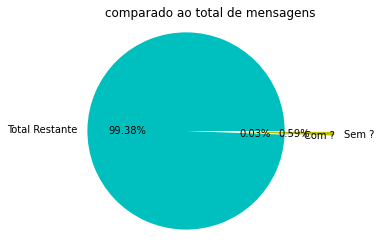

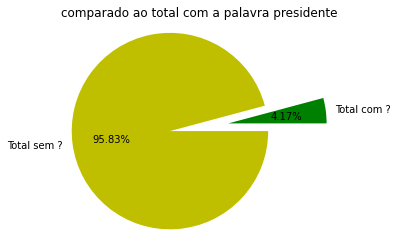

In [ ]:
item = 'presidente'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 2
com_e_sem_interrogacao = 48

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Governador



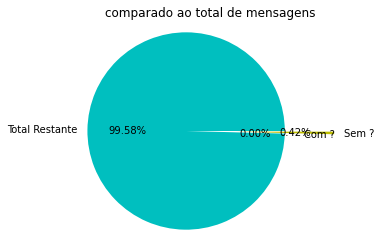

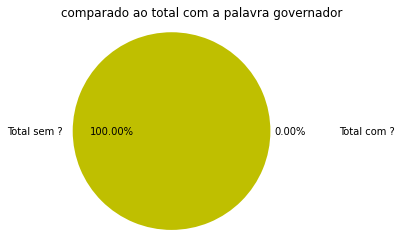

In [ ]:
item = 'governador'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 0
com_e_sem_interrogacao = 33

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Prefeito

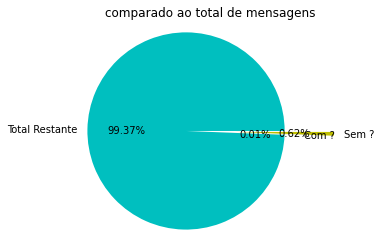

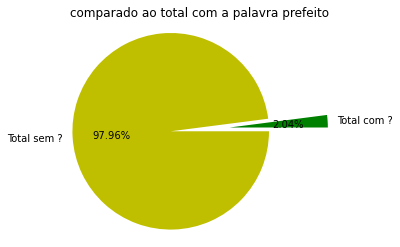

In [ ]:
item = 'prefeito'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 1
com_e_sem_interrogacao = 49

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Morte


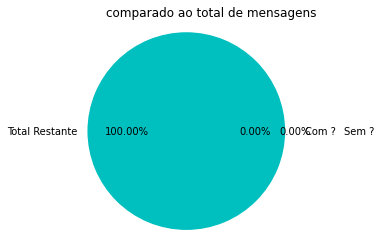

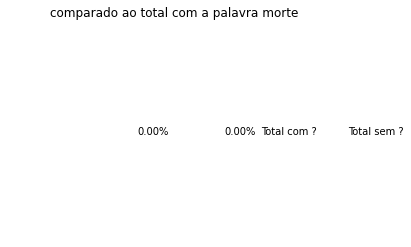

In [ ]:
item = 'morte'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 0
com_e_sem_interrogacao = 0

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Morrer

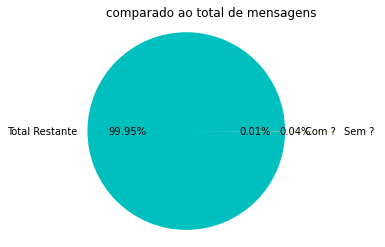

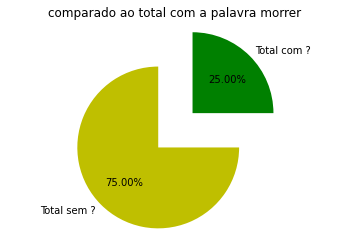

In [ ]:
item = 'morrer'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 1
com_e_sem_interrogacao = 4

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Hospital

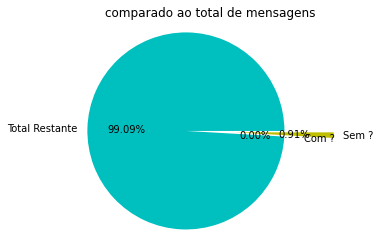

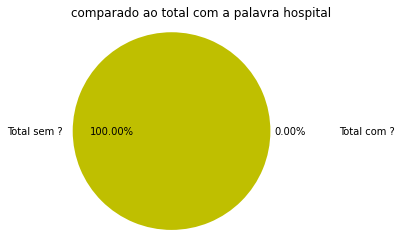

In [ ]:
item = 'hospital'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 0
com_e_sem_interrogacao = 71

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Ministro

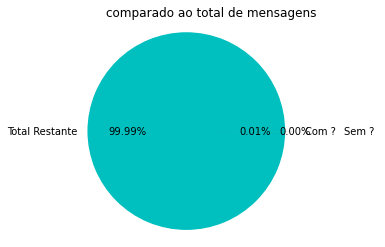

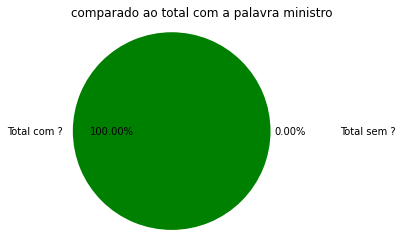

In [ ]:
item = 'ministro'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 1
com_e_sem_interrogacao = 1

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### China

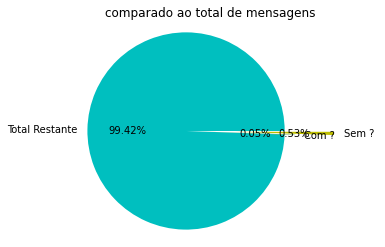

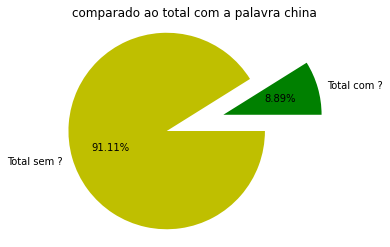

In [ ]:
item = 'china'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 4
com_e_sem_interrogacao = 45

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Chineses

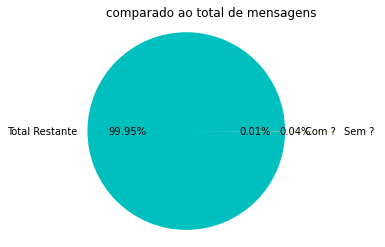

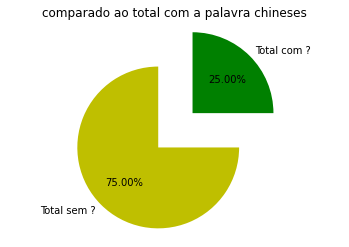

In [ ]:
item = 'chineses'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 1
com_e_sem_interrogacao = 4

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Bolsonaro

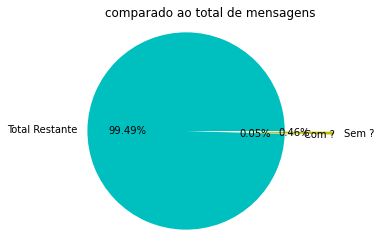

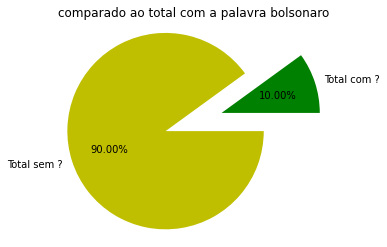

In [ ]:
item = 'bolsonaro'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 4
com_e_sem_interrogacao = 40

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Virus

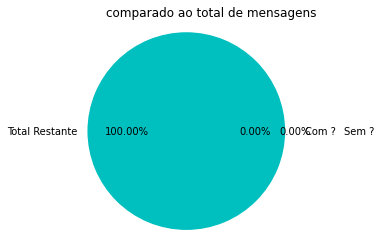

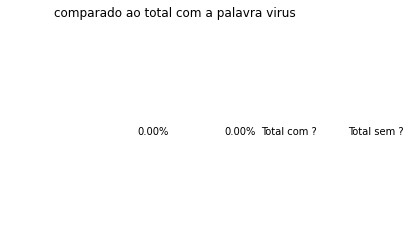

In [ ]:
item = 'virus'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 0
com_e_sem_interrogacao = 0

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Coronavírus

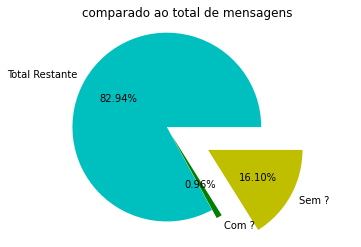

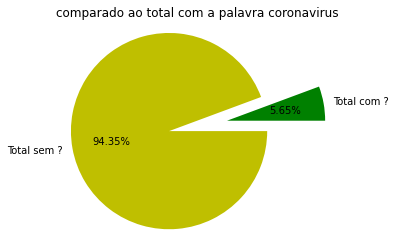

In [ ]:
item = 'coronavirus'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 75
com_e_sem_interrogacao = 1327

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Gripezinha

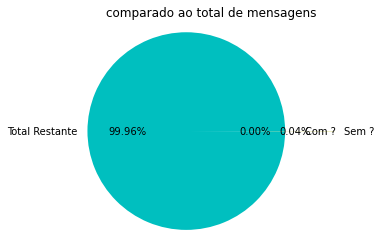

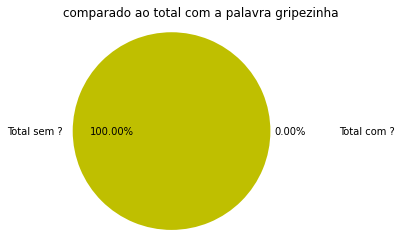

In [ ]:
item = 'gripezinha'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 0
com_e_sem_interrogacao = 3

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### Pandemia

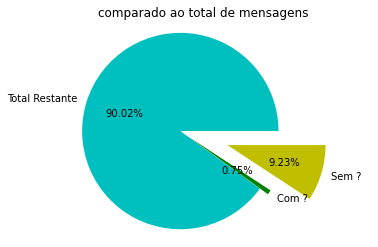

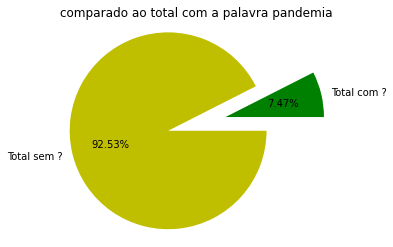

In [ ]:
item = 'pandemia'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 58
com_e_sem_interrogacao = 776

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

### MP

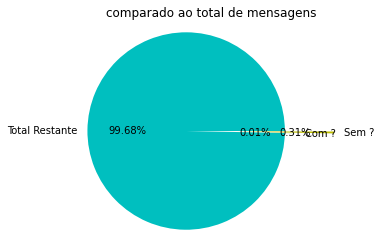

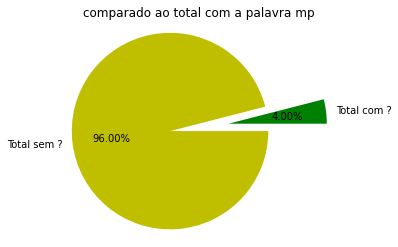

In [ ]:
item = 'mp'
labels = 'Total Restante', 'Com ?', 'Sem ?'
total = 7777
com_interrogacao = 1
com_e_sem_interrogacao = 25

sections = [ (total - com_e_sem_interrogacao) , com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0, 0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total de mensagens')
plt.show()


labels =  'Total com ?', 'Total sem ?'
sections = [ com_interrogacao, (com_e_sem_interrogacao - com_interrogacao)]
colors = [ 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=0,
        explode = (0.1, .50),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('comparado ao total com a palavra ' + item)
plt.show()

## Segunda Conclusão da Interpretação

Através das primeiras execuções do código foi perceptível que o resultado eram valores muito abaixo do esperado e que revisões eram necessárias, melhorias foram feitas para resolver problemas como case sensitive e o espaçamento do foco que era a interrogação presente na frase.

## Pesquisas adicionais

Devido a conclusão obtida com a segunda interpretação, novas pesquisas foram feitas para validar o tipo de conteúdo presente e chegar a uma terceira conclusão.

In [ ]:
#@title Opções de Filtragem: praia { form-width: "70%" }
qual_palavra = "praia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra praia terminou 
 Foram filtrados um total de 2 itens 
 sendo eles [504, 579]


In [ ]:
#@title Opções de Filtragem: saudades { form-width: "70%" }
qual_palavra = "praia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra praia terminou 
 Foram filtrados um total de 2 itens 
 sendo eles [504, 579]


In [ ]:
#@title Opções de Filtragem: #TBT { form-width: "70%" }
qual_palavra = "tbt" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra tbt terminou 
 Foram filtrados um total de 10 itens 
 sendo eles [114, 123, 313, 325, 395, 398, 483, 541, 542, 553]


In [ ]:
#@title Opções de Filtragem: manaus { form-width: "70%" }
qual_palavra = "praia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra praia terminou 
 Foram filtrados um total de 2 itens 
 sendo eles [504, 579]


In [ ]:
csv_utilizado = pd.read_csv("/content/pesquisa_interrogacao.csv")
# É simplificado o texto colocando tudo em caixa baixa
filtro1 = csv_utilizado.iloc[504]['texto'].lower()
# Para então buscado a interrogação e adicionando espaços ao redor dela
filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
# As hashtags são removidas e substituídas por espaços
filtro3 = filtro2.replace("#"," ") # remove hashtags
# as quebras de linhas são substituidas por espaço
filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
# a acentuação do i é removido para evitar conflitos como em vírus x virus
filtro5 = filtro4.replace("í","i") # remove quebra de linha
# e a string é transformada em um array de caracteres tendo espaço como divisor
palavras = filtro5.split(' ')


print(csv_utilizado.iloc[504]['apelido'].lower(),'\n digitou',
      'no dia',csv_utilizado.iloc[504]['data'].lower(),'\n',
      filtro5)

hugocolodedeus 
 digitou no dia 2020-06-01 00:32:06 
 saudade de uma praia no nordeste né minha filha ?  😭😭🦠 covid_19  vaipassar em ponta negra, rio grande do norte, brazil https://t.co/kn4uebk07v


In [ ]:
csv_utilizado = pd.read_csv("/content/pesquisa_interrogacao.csv")
# É simplificado o texto colocando tudo em caixa baixa
filtro1 = csv_utilizado.iloc[579]['texto'].lower()
# Para então buscado a interrogação e adicionando espaços ao redor dela
filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
# As hashtags são removidas e substituídas por espaços
filtro3 = filtro2.replace("#"," ") # remove hashtags
# as quebras de linhas são substituidas por espaço
filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
# a acentuação do i é removido para evitar conflitos como em vírus x virus
filtro5 = filtro4.replace("í","i") # remove quebra de linha
# e a string é transformada em um array de caracteres tendo espaço como divisor
palavras = filtro5.split(' ')

print(csv_utilizado.iloc[579]['apelido'].lower(),'\n digitou',
      'no dia',csv_utilizado.iloc[579]['data'].lower(),'\n',
      filtro5)

lamonier 
 digitou no dia 2020-06-28 14:19:38 
 saudade de uma praia no domingo,  né meu filho ?  demais! 🌊☀️ .  praia  quarentena  domingo  tibau   rn  saudade… https://t.co/fqgiuts7ih


## Terceira Conclusão da Interpretação



Mesmo com as filtragens e a remoção de duplicatas, graças aos dados baixos obtidos com a pesquisa comparacional de palavras com ou sem interrogação, foi possível dizer que existe spam na datasheet trabalhado.

## Frequência das perguntas

A quarta interpretação se deu através da análise da frequência de perguntas por data e para isso foi criado uma nova coluna com a divisão da data e da hora para a montagem do gráfico.

In [ ]:
csv_utilizado = pd.read_csv("/content/pesquisa_interrogacao.csv")

new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
csv_utilizado['data'] = new[0].str.replace('-','/')
csv_utilizado['hora'] = new[1]

pd.DataFrame(csv_utilizado).tail()


,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo,hora
587,587,uberfashion,2020/06/30,"2020 seu lindo? ⁣\n⁣\napenas marque seu amigo,...",pt,brazil,-42.533300,-22.266700,BR,nova friburgo,NaN,19:16:58
588,588,pimenta_cute,2020/06/30,o que vc está fazendo na quarentena?!\n.\n.\n....,pt,brazil,-49.270700,-16.686900,BR,goiânia,NaN,21:07:52
589,589,armandopugliesi,2020/06/30,e aí? tá se alimentando saudável na quarentena...,pt,brazil,-34.903626,-8.127848,BR,recife,NaN,22:17:48
590,590,aposentadosel,2020/06/30,e no café da tarde tivemos....\n\nbolinho de c...,pt,brazil,-47.333800,-22.739900,BR,americana,NaN,22:40:51
591,591,marinacrystals,2020/06/30,cem dias de quarentena. \n○\nquem tem um livro...,pt,brazil,-46.633300,-23.550000,BR,sao paulo,NaN,23:19:22


A análise dos dados de maior valor foram feitos em seguida através de um value_counts(), nesse ponto que se mostrou essencial a divisão do dia da hora para evitar valores repetidas de mesmo dia com horário diferente.

In [ ]:
gmaior = csv_utilizado['data'].value_counts()
gmaior

2020/04/04    22
2020/04/16    20
2020/04/02    19
2020/03/21    19
2020/03/31    17
              ..
2020/06/15     1
2020/05/08     1
2020/01/31     1
2020/05/13     1
2020/06/18     1
Name: data, Length: 104, dtype: int64

E o gráfico foi montado aplicando o .sort_index() ao resultado obtido na contagem para se ter a progressão por tempo.

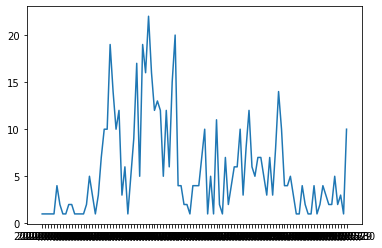

In [ ]:
g = csv_utilizado['data'].value_counts().sort_values().sort_index()
plt.plot(g)


Através da análise foi possível perceber que no dia 04 de abril houveram 22 perguntas. Foi feita uma pesquisa no histórico de notícias da pandêmia do G1 (fonte: https://g1.globo.com/bemestar/coronavirus/noticia/2020/04/04/ultimas-noticias-de-coronavirus-de-4-de-abril.ghtml ) para se saber quais foram as príncipais notícias do dia e entre elas houve a primeira morte no Amapá. Quando pesquisado no banco de textos em português foram encontradas dois resultados.



In [ ]:
#@title Teste de Filtragem 04/04/2020 - Amapá { form-width: "70%" }
qual_palavra = "amap\xE1" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_amapa" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra amapá terminou 
 Foram filtrados um total de 2 itens 
 sendo eles [4378, 5356]


In [ ]:
#@title Texto encontrado
posicao_parar_procurar = "4378" #@param {type:"string"}
url_csv_para_usar = "/content/DadosOrdemData.csv" #@param {type:"string"}
def filtrar_palavra(url_csv,posicao_procurada_str):
  csv_utilizado = pd.read_csv(url_csv)
  # É simplificado o texto colocando tudo em caixa baixa
  posicao_procurada = int(posicao_procurada_str)
  filtro1 = csv_utilizado.iloc[posicao_procurada]['texto'].lower()
  # Para então buscado a interrogação e adicionando espaços ao redor dela
  filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
  # As hashtags são removidas e substituídas por espaços
  filtro3 = filtro2.replace("#"," ") # remove hashtags
  # as quebras de linhas são substituidas por espaço
  filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
  # a acentuação do i é removido para evitar conflitos como em vírus x virus
  filtro5 = filtro4.replace("í","i") # remove quebra de linha
  # e a string é transformada em um array de caracteres tendo espaço como divisor
  palavras = filtro5.split(' ')
  print(csv_utilizado.iloc[posicao_procurada]['apelido'].lower(),'\n digitou',
      'no dia',csv_utilizado.iloc[posicao_procurada]['data'].lower(),'\n',
      filtro5)
  
filtrar_palavra(url_csv_para_usar,posicao_parar_procurar)

idelfonso65 
 digitou no dia 2020-04-08 21:30:34 
 só pra avisar o deputado dr vitor que já são 107 casos confirmados e o estado do amapá em alerta vermelha. será hor… https://t.co/elzt1kaont


Mesmo não tendo a mesma data, é percepítvel que existe a cobrança a figuras políticas sobre as situações em diferentes estados.

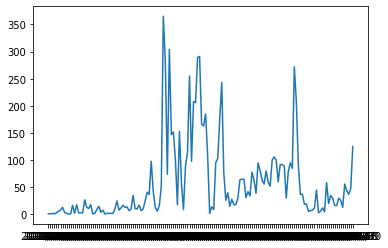

In [ ]:
#@title Montar gráfico frequência simples por csv
url_do_csv_para_usar = "/content/DadosOrdemData.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

grafico_frequencia(url_do_csv_para_usar)

In [ ]:
#@title Filtragem "Deputado" { form-width: "70%" }
qual_palavra = "deputado" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_deputado" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra deputado terminou 
 Foram filtrados um total de 12 itens 
 sendo eles [447, 1762, 2697, 3392, 4378, 4535, 6783, 7034, 7065, 7235, 7376, 7651]


2020/05/27    2
2020/03/31    1
2020/04/04    1
2020/06/01    1
2020/04/09    1
2020/05/30    1
2020/06/02    1
2020/04/08    1
2020/03/21    1
2020/05/24    1
2020/03/10    1
Name: data, dtype: int64 



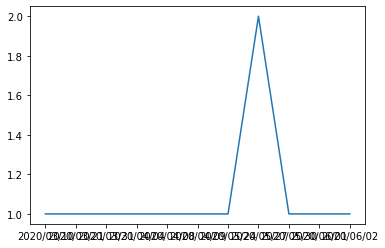

In [ ]:
#@title Gráfico Frequência "Deputado"
url_do_csv_para_usar = "/content/pesquisa_deputado.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)
  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)

## Quarta Conclusão da Interpretação

Sendo feita novamente a pesquisa no G1 sobre o dia foi possível encontrar novas palavras chaves, assim, podendo concluir a importância do uso da frequência como essêncial para determinar as palavras necessárias para o projeto.

### Correção a lógica da filtragem

In [ ]:
# Tendo um datasheet escolhido
csv_utilizado = pd.read_csv("/content/DadosOrdemData.csv")
# É simplificado o texto colocando tudo em caixa baixa
filtro1 = csv_utilizado.iloc[48]['texto'].lower()
# Para então buscado a interrogação e adicionando espaços ao redor dela
filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
# As hashtags são removidas e substituídas por espaços
filtro3 = filtro2.replace("#"," ") # remove hashtags
# as quebras de linhas são substituidas por espaço
filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
# a acentuação do i é removido para evitar conflitos como em vírus x virus
filtro5 = filtro4.replace("í","i") # remove quebra de linha
filtro6 = filtro5.replace('ã','a') # remove caractere especial
filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
filtro8 = filtro7.replace('ç','c') # remove caractere especial
filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
filtro10 = filtro9.replace('ê','e') # remove caractere especial
filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
# e a string é transformada em um array de caracteres tendo espaço como divisor
palavras = filtro11.split(' ')

# Essa lógica desenvolvida foi então colocada dentro do método de filtragem utilizado
print(palavras)


['acabo', 'de', 'saber', '', '', '', 'o', 'primeiro', 'caso', 'de', 'coronavirus', 'no', 'estado', 'do', 'ceará', '.', '🤒😷', 'em', 'caucaia', '', 'ceara', '', 'brazil', 'https://t', '.', 'co/dctnx8kugt']


### Correção método de filtragem

In [ ]:

def filtrar_e_exportar_v2(csv_usado,formatar,palavra,exportar,nome):      
  obj_para_download = []
  dic_para_download = {}

  # ----------------------
  # FILTRANDO DADOS DOWNLOAD
  # ----------------------
  num_dataset_filtrado = len(csv_usado)
  ids_filtrados = []
  num_filtrados = 0
  for i in range(num_dataset_filtrado):
    filtro1 = csv_usado.iloc[i]['texto'].lower()
    # Para então buscado a interrogação e adicionando espaços ao redor dela
    filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
    # As hashtags são removidas e substituídas por espaços
    filtro3 = filtro2.replace("#"," ") # remove hashtags
    # as quebras de linhas são substituidas por espaço
    filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
    # a acentuação do i é removido para evitar conflitos como em vírus x virus
    filtro5 = filtro4.replace("í","i") # remove quebra de linha
    filtro6 = filtro5.replace('ã','a') # remove caractere especial
    filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
    filtro8 = filtro7.replace('ç','c') # remove caractere especial
    filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
    filtro10 = filtro9.replace('ê','e') # remove caractere especial
    filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
    # e a string é transformada em um array de caracteres tendo espaço como divisor
    palavras = filtro11.split(' ')
    adicionado = False

    if (i>=0):
    # if (formatar):
    #   edit_filtro1 = filtro1.translate({ord(c): None for c in string.whitespace})
    #   filtro1 = edit_filtro1
      for d in range(len(palavras)):
        if (d==0):
          adicionado = False #debug
        if (palavras[d]==palavra):
          # print('achou valor')
          num_filtrados +=1
          if (adicionado == False):
            adicionado = True
            ids_filtrados.append(csv_usado.iloc[i]['posicao'])
      # try:
      #   valor = filtro1.find(palavra)
      #   if (valor!=-1):
      #     num_filtrados +=1
      #     ids_filtrados.append(i)
      # except:
      #   print("erro")
      if (i == num_dataset_filtrado-1):
        print("\n Filtragem da palavra",palavra,"terminou",
              "\n Foram filtrados um total de", len(ids_filtrados), "itens",
              "\n sendo eles",ids_filtrados)
      
  # ----------------------
  # FORMATAR DOWNLOAD
  # ----------------------

  for i in range(len(ids_filtrados)):
      posicao_formatado = ids_filtrados[i]
      data_list = {'id': str(i),
                  'apelido':csv_usado.iloc[posicao_formatado]['apelido'],
                  'texto':csv_usado.iloc[posicao_formatado]['texto'],
                  'data':csv_usado.iloc[posicao_formatado]['data'],
                  'idioma':csv_usado.iloc[posicao_formatado]['idioma'],
                  'pais':csv_usado.iloc[posicao_formatado]['pais'],
                  'latitude':csv_usado.iloc[posicao_formatado]['latitude'],
                  'longitude':csv_usado.iloc[posicao_formatado]['longitude'],
                  'sigla':csv_usado.iloc[posicao_formatado]['sigla'],
                  'lugar':csv_usado.iloc[posicao_formatado]['lugar']}
      obj_para_download.append(data_list)

  # ----------------------
  # EXPORTANDO CSV
  # ----------------------

  gerarDownload = exportar
  nome_csv = "datasheet_" + str(palavra)
  if(nome != ""):
    nome_csv = nome_do_arquivo

  if(gerarDownload):
    for di in obj_para_download:
      dic_para_download[di['id']]={}
      for k in di.keys():
        if k =='id': continue
        dic_para_download[di['id']][k]=di[k]
        
    with open( nome_csv +'.csv', 'w') as csv_file:  
      writer = csv.writer(csv_file)
      writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                      'idioma','pais','latitude','longitude','sigla',
                      'lugar','resumo'])
      for key, value in dic_para_download.items():
        writer.writerow([key, value['apelido'], value['data'], 
                        value['texto'], value['idioma'],
                        value['pais'], value['latitude'],
                        value['longitude'], value['sigla'],
                        value['lugar'] ])
        

In [ ]:

def imprimir_csv(url_para_imprimir):
  csv_passado = pd.read_csv(url_para_imprimir)
  return pd.DataFrame(csv_passado)

In [ ]:
#@title Opções de Filtragem Versão 2: pandemia { form-width: "70%" }
qual_palavra = "pandemia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar_v2(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra pandemia terminou 
 Foram filtrados um total de 986 itens 
 sendo eles [80, 85, 98, 196, 200, 233, 250, 267, 281, 301, 312, 323, 326, 360, 423, 432, 440, 444, 480, 484, 492, 496, 497, 500, 501, 502, 505, 507, 529, 530, 535, 536, 543, 544, 554, 556, 559, 565, 570, 572, 574, 576, 577, 578, 579, 595, 608, 619, 626, 629, 631, 632, 633, 634, 635, 638, 640, 641, 642, 645, 646, 648, 651, 652, 653, 657, 658, 717, 742, 761, 774, 787, 790, 792, 793, 795, 796, 818, 819, 825, 830, 838, 847, 857, 859, 871, 872, 891, 900, 920, 942, 962, 976, 977, 980, 982, 992, 999, 1001, 1006, 1008, 1022, 1075, 1118, 1138, 1148, 1152, 1157, 1167, 1192, 1198, 1202, 1206, 1212, 1221, 1225, 1227, 1230, 1246, 1250, 1253, 1258, 1260, 1264, 1271, 1278, 1280, 1297, 1299, 1300, 1304, 1307, 1313, 1315, 1325, 1337, 1340, 1345, 1348, 1358, 1363, 1369, 1370, 1382, 1414, 1415, 1419, 1439, 1497, 1499, 1519, 1521, 1579, 1594, 1597, 1624, 1631, 1654, 1664, 1665, 1679, 1686, 1850, 1923, 1930, 1945, 1946, 1948

Com as correções feitas a pesquisa por pandêmia foi de 776 itens para 986 em todos os dados em português.

In [ ]:
#@title Opções de Filtragem Versão 2: pandemia com interrogação { form-width: "70%" }
qual_palavra = "pandemia" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = False #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_oportunidades" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar_v2(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra pandemia terminou 
 Foram filtrados um total de 72 itens 
 sendo eles [14, 22, 25, 27, 100, 101, 102, 103, 104, 113, 133, 149, 150, 157, 181, 201, 253, 260, 266, 282, 283, 285, 288, 290, 304, 313, 318, 341, 351, 352, 353, 356, 358, 359, 361, 367, 377, 383, 395, 397, 399, 414, 418, 425, 426, 430, 441, 455, 456, 457, 467, 472, 479, 481, 490, 497, 506, 513, 515, 519, 522, 524, 526, 540, 549, 552, 556, 560, 565, 566, 569, 571]


Com as correções feitas a pesquisa por pandêmia foi de 58 itens para 72 em todos os dados em português.

### Criação de novo datasheet de perguntas

In [ ]:
#@title Opções de Filtragem Versão 2: pandemia com interrogação { form-width: "70%" }
qual_palavra = "?" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_interrogacao_v2" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

filtrar_e_exportar_v2(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ? terminou 
 Foram filtrados um total de 592 itens 
 sendo eles [5, 13, 54, 73, 82, 92, 102, 105, 109, 117, 124, 137, 173, 193, 196, 252, 259, 311, 350, 397, 468, 494, 497, 521, 541, 565, 566, 579, 620, 622, 630, 663, 710, 715, 735, 814, 856, 879, 959, 1023, 1046, 1056, 1124, 1149, 1150, 1172, 1181, 1194, 1245, 1302, 1314, 1316, 1389, 1392, 1411, 1413, 1417, 1424, 1426, 1442, 1448, 1457, 1471, 1476, 1488, 1496, 1498, 1508, 1552, 1560, 1565, 1595, 1598, 1629, 1636, 1643, 1713, 1716, 1721, 1735, 1754, 1774, 1788, 1795, 1802, 1820, 1822, 1826, 1851, 1869, 1870, 1881, 1891, 1893, 1895, 1913, 1921, 1932, 1933, 1950, 1971, 2015, 2020, 2022, 2045, 2066, 2067, 2075, 2076, 2105, 2114, 2129, 2135, 2139, 2157, 2160, 2162, 2165, 2172, 2182, 2195, 2226, 2234, 2298, 2300, 2312, 2397, 2412, 2423, 2434, 2446, 2485, 2513, 2528, 2539, 2543, 2552, 2557, 2580, 2588, 2599, 2609, 2621, 2622, 2629, 2639, 2676, 2679, 2683, 2700, 2716, 2754, 2770, 2772, 2782, 2787, 2816, 2837, 2865, 2917

2020/04/04    22
2020/04/16    20
2020/04/02    19
2020/03/21    19
2020/03/31    17
              ..
2020/06/15     1
2020/05/08     1
2020/01/31     1
2020/05/13     1
2020/06/18     1
Name: data, Length: 104, dtype: int64 



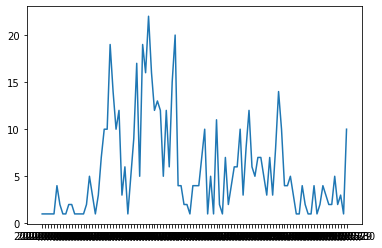

In [ ]:
#@title Gráfico Frequência Pergunta v2
url_do_csv_para_usar = "/content/pesquisa_interrogacao_v2.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)
  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Mapa interativo
url_para_uso = "/content/pesquisa_interrogacao_v2.csv" #@param {type:"string"}
def generate_map(url_do_csv):
  m = folium.Map(
      height='80%',
      width='80%',
      location=[-23.53, -46.79],
      zoom_start=4,
      tiles='Stamen Terrain'
  )
  csv_para_usar = pd.read_csv(url_do_csv)
  for i in range(len(csv_para_usar)):
    if (i < 500):
      filtro1 = csv_utilizado.iloc[i]['texto'].lower()
      # Para então buscado a interrogação e adicionando espaços ao redor dela
      filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
      # As hashtags são removidas e substituídas por espaços
      filtro3 = filtro2.replace("#"," ") # remove hashtags
      # as quebras de linhas são substituidas por espaço
      filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
      # a acentuação do i é removido para evitar conflitos como em vírus x virus
      filtro5 = filtro4.replace("í","i") # remove quebra de linha
      filtro6 = filtro5.replace('ã','a') # remove caractere especial
      filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
      filtro8 = filtro7.replace('ç','c') # remove caractere especial
      filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
      filtro10 = filtro9.replace('ê','e') # remove caractere especial
      filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
      filtro12 = filtro11.replace('á', 'a') # ajusta espaçamento de palavra
      filtro13 = filtro12.replace('à', 'a') # ajusta espaçamento de palavra
      tooltip = csv_utilizado.iloc[i]['apelido'].lower()
      texto = '<i>' +  csv_utilizado.iloc[i]['data'].lower() + " em " + csv_utilizado.iloc[i]['lugar'].lower() + " - " + filtro11 +' </i>'
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      folium.Marker([float(longitude),float(latitude)], popup=texto, tooltip=tooltip).add_to(m)
  
  return m

generate_map(url_para_uso)

### Método de filtragem de Array de Palavras

In [ ]:

def filtrar_array_e_exportar_(csv_usado,formatar,palavra,exportar,nome):      
  obj_para_download = []
  dic_para_download = {}

  # ----------------------
  # FILTRANDO DADOS DOWNLOAD
  # ----------------------
  num_dataset_filtrado = len(csv_usado)
  ids_filtrados = []
  num_filtrados = 0
  for i in range(num_dataset_filtrado):
    filtro1 = csv_usado.iloc[i]['texto'].lower()
    # Para então buscado a interrogação e adicionando espaços ao redor dela
    filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
    # As hashtags são removidas e substituídas por espaços
    filtro3 = filtro2.replace("#"," ") # remove hashtags
    # as quebras de linhas são substituidas por espaço
    filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
    # a acentuação do i é removido para evitar conflitos como em vírus x virus
    filtro5 = filtro4.replace("í","i") # remove quebra de linha
    filtro6 = filtro5.replace('ã','a') # remove caractere especial
    filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
    filtro8 = filtro7.replace('ç','c') # remove caractere especial
    filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
    filtro10 = filtro9.replace('ê','e') # remove caractere especial
    filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
    # e a string é transformada em um array de caracteres tendo espaço como divisor
    palavras = filtro11.split(' ')
    adicionado = False

    if (i>=0):
    # if (formatar):
    #   edit_filtro1 = filtro1.translate({ord(c): None for c in string.whitespace})
    #   filtro1 = edit_filtro1
      for d in range(len(palavras)):
        if (d==0):
          adicionado = False #debug
        for e in range(len(palavra)):
          if (palavras[d]==palavra[e]):
            # print('achou valor')
            num_filtrados +=1
            if (adicionado == False):
              adicionado = True
              ids_filtrados.append(csv_usado.iloc[i]['posicao'])
      # try:
      #   valor = filtro1.find(palavra)
      #   if (valor!=-1):
      #     num_filtrados +=1
      #     ids_filtrados.append(i)
      # except:
      #   print("erro")
      if (i == num_dataset_filtrado-1):
        print("\n Filtragem da palavra",palavra,"terminou",
              "\n Foram filtrados um total de", len(ids_filtrados), "itens",
              "\n sendo eles",ids_filtrados)
      
  # ----------------------
  # FORMATAR DOWNLOAD
  # ----------------------

  for i in range(len(ids_filtrados)):
      posicao_formatado = ids_filtrados[i]
      data_list = {'id': str(i),
                  'apelido':csv_usado.iloc[posicao_formatado]['apelido'],
                  'texto':csv_usado.iloc[posicao_formatado]['texto'],
                  'data':csv_usado.iloc[posicao_formatado]['data'],
                  'idioma':csv_usado.iloc[posicao_formatado]['idioma'],
                  'pais':csv_usado.iloc[posicao_formatado]['pais'],
                  'latitude':csv_usado.iloc[posicao_formatado]['latitude'],
                  'longitude':csv_usado.iloc[posicao_formatado]['longitude'],
                  'sigla':csv_usado.iloc[posicao_formatado]['sigla'],
                  'lugar':csv_usado.iloc[posicao_formatado]['lugar']}
      obj_para_download.append(data_list)

  # ----------------------
  # EXPORTANDO CSV
  # ----------------------

  gerarDownload = exportar
  nome_csv = "datasheet_" + str(palavra)
  if(nome != ""):
    nome_csv = nome_do_arquivo

  if(gerarDownload):
    for di in obj_para_download:
      dic_para_download[di['id']]={}
      for k in di.keys():
        if k =='id': continue
        dic_para_download[di['id']][k]=di[k]
        
    with open( nome_csv +'.csv', 'w') as csv_file:  
      writer = csv.writer(csv_file)
      writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                      'idioma','pais','latitude','longitude','sigla',
                      'lugar','resumo'])
      for key, value in dic_para_download.items():
        writer.writerow([key, value['apelido'], value['data'], 
                        value['texto'], value['idioma'],
                        value['pais'], value['latitude'],
                        value['longitude'], value['sigla'],
                        value['lugar'] ])
        

# Pesquisa quanto a pessoa

In [ ]:

qual_palavra = "presidente,governador,prefeito,deputado,bolso,bolsonaro,doria,mandetta,mandeta,moro,ministro,gov,min,hulk,luciano,pink,charles,elizabeth,boulos,ciro,lula,trump"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_pessoas_interrogacao_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao_v2.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['presidente', 'governador', 'prefeito', 'deputado', 'bolso', 'bolsonaro', 'doria', 'mandetta', 'mandeta', 'moro', 'ministro', 'gov', 'min', 'hulk', 'luciano', 'pink', 'charles', 'elizabeth', 'boulos', 'ciro', 'lula', 'trump'] terminou 
 Foram filtrados um total de 10 itens 
 sendo eles [4, 132, 135, 201, 336, 345, 354, 435, 486, 532]


In [ ]:
#@title Imprimir data_sheet
url_para_imprimir = "/content/pesquisa_pessoas_interrogacao_1.csv" #@param {type:"string"}
imprimir_csv(url_para_imprimir)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,tracosdenanquim,2020-02-01 23:38:37,o presidente pode tbm editar uma mp e regulame...,pt,brazil,-47.955884,-15.823753,BR,brasília,NaN
1,1,_dani_tricolor,2020-03-30 13:38:53,paciência. disse o presidente sobre mortes anu...,pt,brazil,-34.957742,-8.039494,BR,recife,NaN
2,2,edurodriguesrp,2020-03-30 17:12:14,"com a palavra: o ministro da saúde, @mandetta2...",pt,brazil,-47.800000,-21.166700,BR,ribeirão preto,NaN
3,3,gpanvechio,2020-04-04 12:10:47,concorda? deixe seu comentário - #mandetta #sa...,pt,brazil,-50.872490,-21.797110,BR,osvaldo cruz,NaN
4,4,judimarjsantos,2020-04-29 18:18:52,"e daí? lamento. quer que eu faça o quê?’, diz ...",pt,brazil,-46.633300,-23.550000,BR,sao paulo,NaN
5,5,glisvilde,2020-05-03 15:56:02,#repost prefeitura_horizonte with make_repost\...,pt,brazil,-38.515340,-3.739998,BR,fortaleza,NaN
6,6,servicob10,2020-05-05 18:52:59,será que agora vai?\n#jairbolsonaro\n#bolsonar...,pt,brazil,-48.477200,-1.451100,BR,belém,NaN
7,7,servicob10,2020-05-21 13:19:00,esperar o quê de um verme criminoso?\n#impeach...,pt,brazil,-48.477200,-1.451100,BR,belém,NaN
8,8,julianasena,2020-05-29 15:54:59,✨você acha que sua maneira de se vestir irá mu...,pt,brazil,-46.711885,-23.475639,BR,sao paulo,NaN
9,9,servicob10,2020-06-04 12:11:39,concordam?\n\n#impeachmentbolsonaro\n#covid_19...,pt,brazil,-48.477200,-1.451100,BR,belém,NaN


In [ ]:

qual_palavra = "presidente,governador,prefeito,deputado,bolso,bolsonaro,doria,mandetta,mandeta,moro,ministro,gov,min,hulk,luciano,pink,charles,elizabeth,boulos,ciro,lula,trump"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_pessoas_geral_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['presidente', 'governador', 'prefeito', 'deputado', 'bolso', 'bolsonaro', 'doria', 'mandetta', 'mandeta', 'moro', 'ministro', 'gov', 'min', 'hulk', 'luciano', 'pink', 'charles', 'elizabeth', 'boulos', 'ciro', 'lula', 'trump'] terminou 
 Foram filtrados um total de 227 itens 
 sendo eles [15, 82, 86, 136, 228, 286, 287, 309, 427, 447, 453, 655, 701, 820, 829, 972, 1000, 1005, 1013, 1045, 1160, 1173, 1179, 1188, 1213, 1253, 1259, 1303, 1444, 1518, 1546, 1583, 1602, 1677, 1703, 1707, 1752, 1762, 1910, 1951, 1998, 2200, 2202, 2215, 2283, 2374, 2383, 2393, 2396, 2435, 2489, 2503, 2505, 2513, 2542, 2543, 2584, 2587, 2651, 2684, 2697, 2701, 2702, 2707, 2710, 2727, 2737, 2765, 2777, 2805, 2808, 2817, 2825, 2857, 2886, 2889, 2894, 2908, 2960, 2991, 3094, 3130, 3272, 3276, 3288, 3303, 3324, 3392, 3395, 3420, 3463, 3497, 3629, 3641, 3731, 3841, 3844, 3853, 3876, 3930, 3931, 3941, 3983, 4001, 4048, 4058, 4067, 4071, 4076, 4089, 4090, 4091, 4272, 4347, 4354, 4378, 4395, 4407

2020/04/16    19
2020/03/31    16
2020/04/06    10
2020/03/21     9
2020/04/05     8
              ..
2020/02/06     1
2020/05/25     1
2020/03/20     1
2020/03/17     1
2020/03/22     1
Name: data, Length: 72, dtype: int64 



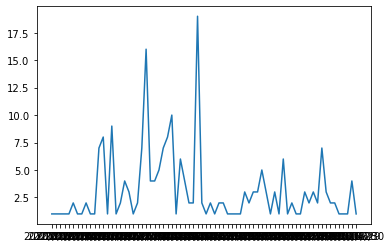

In [ ]:
#@title Gráfico Frequência Pessoas
url_do_csv_para_usar = "/content/pesquisa_pessoas_geral_1.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Mapa Calor
url_para_uso = "/content/pesquisa_pessoas_geral_1.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

# Pesquisa quanto a doença

In [ ]:

qual_palavra = "coronavirus,covid-19,covid,virus,gripezinha"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_coronavirus_interrogacao_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao_v2.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['coronavirus', 'covid-19', 'covid', 'virus', 'gripezinha'] terminou 
 Foram filtrados um total de 151 itens 
 sendo eles [1, 3, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 23, 25, 29, 30, 32, 33, 34, 35, 36, 37, 41, 43, 44, 47, 48, 51, 54, 63, 64, 69, 71, 72, 73, 74, 75, 78, 85, 90, 99, 100, 101, 103, 107, 108, 120, 121, 123, 127, 129, 131, 140, 146, 147, 151, 152, 153, 156, 163, 164, 165, 177, 179, 180, 185, 186, 188, 190, 195, 197, 198, 199, 201, 205, 207, 208, 212, 213, 214, 221, 234, 235, 239, 243, 245, 247, 255, 256, 263, 266, 267, 268, 269, 270, 275, 279, 281, 286, 290, 309, 314, 319, 321, 322, 323, 332, 338, 341, 344, 345, 350, 353, 357, 366, 378, 384, 406, 409, 422, 429, 436, 439, 440, 447, 452, 461, 471, 474, 484, 485, 488, 489, 490, 494, 495, 496, 503, 505, 509, 525, 526, 540, 547, 549, 551, 557, 569, 571]


In [ ]:
#@title Imprimir data_sheet
url_para_imprimir = "/content/pesquisa_coronavirus_interrogacao_1.csv" #@param {type:"string"}
imprimir_csv(url_para_imprimir)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,ac_q,2020-01-21 23:36:11,coronavirus e vc sem plano de saúde? proteção!...,pt,brazil,-34.925700,-8.060500,BR,recife,NaN
1,1,aleksandro_,2020-01-31 20:44:53,quem vence ??? \n#coronavirus #kkkkkk em diade...,pt,brazil,-46.610600,-23.686100,BR,diadema,NaN
2,2,estudiohum,2020-02-04 21:25:43,encomendas da china podem transmitir coronavír...,pt,brazil,-38.782430,-12.242740,BR,coração de maria,NaN
3,3,panlondrina,2020-02-05 04:49:35,quem aí tá com medo do coronavírus?\n\nveja ma...,pt,brazil,-51.165400,-23.309960,BR,londrina,NaN
4,4,nuancesexshop,2020-02-05 16:23:51,medo do coronavirus?\n\ncompre já seu estoque ...,pt,brazil,-34.892827,-8.040162,BR,recife,NaN
...,...,...,...,...,...,...,...,...,...,...,...
146,146,cledirrocha,2020-06-13 04:09:21,quem sou? onde estou? para onde vou?\n#pandemi...,pt,brazil,-34.862700,-7.120700,BR,joão pessoa,NaN
147,147,prluizclaudios1,2020-06-15 13:56:05,alguém poderia explicar?🤷‍♂️\n\npor quê?\n\n- ...,pt,brazil,-46.569700,-23.623800,BR,são caetano do sul,NaN
148,148,brmarquespro,2020-06-18 14:52:25,você anda sem dormir? é tanta preocupação! cov...,pt,brazil,-43.417050,-20.371200,BR,mariana,NaN
149,149,cledirrocha,2020-06-23 03:22:19,onde estamos? para onde vamos?\n#pandemia #cor...,pt,brazil,-34.862700,-7.120700,BR,joão pessoa,NaN


In [ ]:

qual_palavra = "coronavirus,covid-19,covid,virus,gripezinha"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_coronavirus_geral_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['coronavirus', 'covid-19', 'covid', 'virus', 'gripezinha'] terminou 
 Foram filtrados um total de 3097 itens 
 sendo eles [2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 44, 45, 46, 47, 48, 50, 51, 52, 55, 56, 57, 58, 59, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 77, 78, 79, 80, 81, 89, 90, 91, 93, 94, 95, 96, 98, 100, 101, 103, 104, 106, 107, 108, 109, 111, 112, 113, 115, 117, 118, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 134, 135, 137, 139, 140, 142, 143, 144, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 170, 172, 173, 174, 177, 179, 180, 181, 182, 183, 185, 188, 190, 191, 193, 195, 196, 197, 199, 201, 206, 207, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 234, 235, 236, 238, 239, 240, 241, 243, 244, 245, 246, 248, 251, 252, 255, 256, 257, 258, 260, 261, 262, 263, 264, 

2020/03/18    194
2020/03/21    152
2020/04/04    129
2020/04/05    104
2020/03/31    100
             ... 
2020/06/16      1
2020/04/11      1
2020/02/19      1
2020/06/10      1
2020/06/13      1
Name: data, Length: 137, dtype: int64 



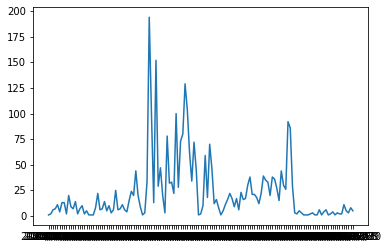

In [ ]:
#@title Gráfico Frequência Doença
url_do_csv_para_usar = "/content/pesquisa_coronavirus_geral_1.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Mapa Calor
url_para_uso = "/content/pesquisa_coronavirus_geral_1.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

# Pesquisa quanto a medicamento

In [ ]:

qual_palavra = "cloroquina,cha,vitamina,zinco,inhame,pr\xF3polis,erva,ch\xE1,hidratacao,sopa,abacaxi"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_medicamento_interrogacao_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao_v2.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['cloroquina', 'cha', 'vitamina', 'zinco', 'inhame', 'própolis', 'erva', 'chá', 'hidratacao', 'sopa', 'abacaxi'] terminou 
 Foram filtrados um total de 7 itens 
 sendo eles [443, 446, 458, 474, 517, 531, 536]


In [ ]:
#@title Imprimir data_sheet
url_para_imprimir = "/content/pesquisa_medicamento_interrogacao_1.csv" #@param {type:"string"}
imprimir_csv(url_para_imprimir)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,ronaldo2910,2020-05-22 02:09:03,"""... cômico ou trágico?... a direita toma clor...",pt,brazil,-48.019070,-16.022673,BR,brasília,NaN
1,1,tiagooportela,2020-05-22 13:35:23,abi pergunta: a quem interessa uso da cloroqui...,pt,brazil,-44.995361,-12.148204,BR,barreiras,NaN
2,2,brunnocastro80,2020-05-24 00:29:22,cloroquina funciona ou não funciona? tire você...,pt,brazil,-43.107050,-22.907361,BR,niterói,NaN
3,3,rgadvam,2020-05-26 21:07:39,é cloroquina ou gasolina o que é usado no trat...,pt,brazil,-60.025300,-3.113330,BR,manaus,NaN
4,4,gustavoalex,2020-06-02 03:39:55,"se a tia da cloroquina pode, por que você não ...",pt,brazil,-51.186595,-30.022210,BR,porto alegre,NaN
5,5,micheleassisjp,2020-06-04 04:34:59,"onde estão aqueles que defendem o ""protocolo"" ...",pt,brazil,-34.862700,-7.120700,BR,joão pessoa,NaN
6,6,fluriqui,2020-06-05 03:30:13,quantas pessoas poderiam ter sido salvas usand...,pt,brazil,-43.946127,-22.916373,BR,mangaratiba,NaN


In [ ]:

qual_palavra = "cloroquina,cha,vitamina,zinco,inhame,pr\xF3polis,erva,ch\xE1,hidratacao,sopa,abacaxi"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_medicamento_geral_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['cloroquina', 'cha', 'vitamina', 'zinco', 'inhame', 'própolis', 'erva', 'chá', 'hidratacao', 'sopa', 'abacaxi'] terminou 
 Foram filtrados um total de 65 itens 
 sendo eles [1178, 1432, 1433, 1434, 1435, 1464, 1752, 1766, 1768, 1997, 2171, 2429, 2439, 2467, 2483, 2490, 2500, 2604, 3235, 3315, 3499, 4308, 4329, 4395, 4598, 4706, 4913, 4924, 5216, 5284, 5338, 5391, 5871, 6031, 6103, 6266, 6339, 6440, 6486, 6497, 6551, 6576, 6658, 6747, 6761, 6800, 6844, 6919, 6946, 6970, 6988, 6994, 7080, 7354, 7484, 7662, 7857, 7940, 7977, 7993, 8147, 8165, 8263, 8295, 8316]


2020/03/29    5
2020/03/20    4
2020/05/26    3
2020/04/08    3
2020/05/24    3
2020/05/21    3
2020/03/21    2
2020/03/30    2
2020/04/15    2
2020/03/22    2
2020/05/22    2
2020/05/27    2
2020/04/03    2
2020/06/05    2
2020/05/15    1
2020/05/23    1
2020/06/04    1
2020/05/18    1
2020/05/28    1
2020/04/17    1
2020/06/03    1
2020/04/29    1
2020/06/17    1
2020/06/01    1
2020/06/16    1
2020/05/31    1
2020/03/19    1
2020/04/12    1
2020/05/12    1
2020/05/01    1
2020/03/25    1
2020/06/19    1
2020/06/22    1
2020/06/21    1
2020/04/16    1
2020/05/19    1
2020/05/25    1
2020/06/02    1
2020/04/04    1
2020/04/14    1
2020/05/14    1
2020/03/23    1
Name: data, dtype: int64 



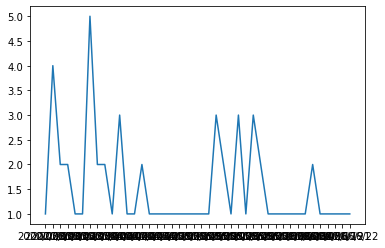

In [ ]:
#@title Gráfico Frequência Medicamento
url_do_csv_para_usar = "/content/pesquisa_medicamento_geral_1.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Mapa Calor
url_para_uso = "/content/pesquisa_medicamento_geral_1.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

# Pesquisa quanto a organizações

In [ ]:

qual_palavra = "prefeitura,delegacia,oms,organizacao,mundial,saude,brics,caixa"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_organizacoes_interrogacao_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/pesquisa_interrogacao_v2.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['prefeitura', 'delegacia', 'oms', 'organizacao', 'mundial', 'saude', 'brics', 'caixa'] terminou 
 Foram filtrados um total de 12 itens 
 sendo eles [5, 44, 54, 133, 135, 146, 201, 304, 331, 490, 531, 551]


In [ ]:
#@title Imprimir data_sheet
url_para_imprimir = "/content/pesquisa_organizacoes_interrogacao_1.csv" #@param {type:"string"}
imprimir_csv(url_para_imprimir)

,posicao,apelido,data,texto,idioma,pais,latitude,longitude,sigla,lugar,resumo
0,0,umras,2020-02-04 04:55:16,quem prepara o churrasco?\n\na organização mun...,pt,people's republic of china,103.000000,35.000000,CN,gansu,NaN
1,1,ruiramosneto,2020-03-19 17:30:07,por que é importante o isolamento social/domic...,pt,brazil,-51.220800,-30.029100,BR,porto alegre,NaN
2,2,papocomagu,2020-03-20 13:41:10,entendeu?\n\n#coronavirus #covid19 #prevenção...,pt,brazil,-46.633300,-23.550000,BR,sao paulo,NaN
3,3,paulocholla,2020-03-30 15:25:18,você sabe o que significa distanciamento socia...,pt,brazil,-46.631485,-23.459307,BR,sao paulo,NaN
4,4,edurodriguesrp,2020-03-30 17:12:14,"com a palavra: o ministro da saúde, @mandetta2...",pt,brazil,-47.800000,-21.166700,BR,ribeirão preto,NaN
5,5,janio_barbosa,2020-03-31 16:15:16,estão pensando que o #coronavírus é brincadeir...,pt,brazil,-36.660800,-9.751900,BR,arapiraca,NaN
6,6,gpanvechio,2020-04-04 12:10:47,concorda? deixe seu comentário - #mandetta #sa...,pt,brazil,-50.872490,-21.797110,BR,osvaldo cruz,NaN
7,7,iasdlote14,2020-04-15 20:00:37,🆕 live | covid-19: preciso mesmo ficar em casa...,pt,brazil,-43.679929,-22.898810,BR,rio de janeiro,NaN
8,8,elquercarlos,2020-04-17 01:29:53,esta esperando o seu auxílio? #fyp #fy #auxi...,pt,brazil,-48.556124,-27.587441,BR,florianópolis,NaN
9,9,leandrolealart,2020-05-29 22:51:26,quais serão as ações emergenciais da prefeitur...,pt,brazil,-49.270500,-25.433900,BR,curitiba,NaN


In [ ]:

qual_palavra = "prefeitura,delegacia,oms,organizacao,mundial,saude,brics,caixa"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_organizacoes_geral_1" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/DadosOrdemData.csv" #@param ["/content/pesquisa_interrogacao_v2.csv", "/content/DadosOrdemData.csv"]
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['prefeitura', 'delegacia', 'oms', 'organizacao', 'mundial', 'saude', 'brics', 'caixa'] terminou 
 Foram filtrados um total de 307 itens 
 sendo eles [7, 19, 25, 34, 92, 98, 142, 146, 154, 167, 247, 256, 267, 277, 290, 292, 303, 329, 341, 370, 385, 390, 400, 432, 444, 492, 496, 500, 501, 502, 505, 507, 515, 519, 540, 544, 556, 576, 584, 586, 598, 618, 628, 629, 638, 639, 644, 648, 653, 718, 775, 780, 788, 822, 838, 854, 859, 900, 912, 920, 922, 946, 966, 988, 1000, 1005, 1011, 1033, 1035, 1037, 1053, 1061, 1079, 1106, 1142, 1150, 1204, 1207, 1209, 1224, 1226, 1229, 1250, 1255, 1271, 1296, 1301, 1338, 1339, 1340, 1347, 1364, 1370, 1376, 1380, 1398, 1411, 1466, 1547, 1673, 1686, 1690, 1744, 1746, 1749, 1973, 1977, 1979, 2010, 2025, 2088, 2239, 2259, 2316, 2367, 2387, 2477, 2525, 2528, 2543, 2582, 2623, 2646, 2654, 2676, 2734, 2762, 2796, 2798, 2820, 2871, 2888, 2890, 2898, 2910, 2972, 3042, 3120, 3126, 3139, 3145, 3221, 3313, 3340, 3366, 3396, 3463, 3537, 3601, 363

2020/03/18    24
2020/03/19    21
2020/06/01    11
2020/04/07    11
2020/04/08    11
              ..
2020/06/22     1
2020/05/07     1
2020/05/03     1
2020/06/15     1
2020/03/10     1
Name: data, Length: 82, dtype: int64 



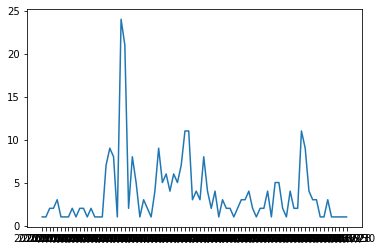

In [ ]:
#@title Gráfico Frequência Organização
url_do_csv_para_usar = "/content/pesquisa_organizacoes_geral_1.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Mapa Calor
url_para_uso = "/content/pesquisa_organizacoes_geral_1.csv" #@param {type:"string"}

def generate_mapa_calor():
  data = []
  for i in range(len(csv_para_usar)):
    if (i < 500):
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      data.append([float(longitude),float(latitude)])
  m = folium.Map(tiles='stamentoner', 
      height='80%',
      width='50%',
      location=[-23.53, -46.79],
      zoom_start=4)
  HeatMap(data).add_to(m)
  #m.save(os.path.join('results', 'Heatmap.html'))
  return m

generate_mapa_calor()

# Dados sem Localização 

In [ ]:
#@title Opções de Filtragem Sem Lugar: perguntas com interrogação { form-width: "70%" }


def filtrar_e_exportar_v3(csv_usado,formatar,palavra,exportar,nome):      
  obj_para_download = []
  dic_para_download = {}

  # ----------------------
  # FILTRANDO DADOS DOWNLOAD
  # ----------------------
  df2 = csv_usado.dropna(subset=['lugar'])
  df1 = csv_usado.drop(df2.index)
  csv_usado = df1

  # Fonte: https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a
  # Get indexes where name column doesn't have value john
  indexNames = df1[~(df1['idioma'] == 'pt')].index 
  # Delete these row indexes from dataFrame
  df1.drop(indexNames , inplace=True)
  num_dataset_filtrado = len(df1)
  ids_filtrados = []
  num_filtrados = 0
  for i in range(num_dataset_filtrado):
    filtro1 = csv_usado.iloc[i]['texto'].lower()
    # Para então buscado a interrogação e adicionando espaços ao redor dela
    filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
    # As hashtags são removidas e substituídas por espaços
    filtro3 = filtro2.replace("#"," ") # remove hashtags
    # as quebras de linhas são substituidas por espaço
    filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
    # a acentuação do i é removido para evitar conflitos como em vírus x virus
    filtro5 = filtro4.replace("í","i") # remove quebra de linha
    filtro6 = filtro5.replace('ã','a') # remove caractere especial
    filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
    filtro8 = filtro7.replace('ç','c') # remove caractere especial
    filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
    filtro10 = filtro9.replace('ê','e') # remove caractere especial
    filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
    # e a string é transformada em um array de caracteres tendo espaço como divisor
    palavras = filtro11.split(' ')
    adicionado = False

    if (i>=0):
    # if (formatar):
    #   edit_filtro1 = filtro1.translate({ord(c): None for c in string.whitespace})
    #   filtro1 = edit_filtro1
      for d in range(len(palavras)):
        if (d==0):
          adicionado = False #debug
        if (palavras[d]==palavra):
          # print('achou valor')
          num_filtrados +=1
          if (adicionado == False):
            adicionado = True
            ids_filtrados.append(i)
      # try:
      #   valor = filtro1.find(palavra)
      #   if (valor!=-1):
      #     num_filtrados +=1
      #     ids_filtrados.append(i)
      # except:
      #   print("erro")
      if (i == num_dataset_filtrado-1):
        print("\n Filtragem da palavra",palavra,"terminou",
              "\n Foram filtrados um total de", len(ids_filtrados), "itens",
              "\n sendo eles",ids_filtrados)
      
  # ----------------------
  # FORMATAR DOWNLOAD
  # ----------------------

  for i in range(len(ids_filtrados)):
      posicao_formatado = ids_filtrados[i]
      data_list = {'id': str(i),
                  'apelido':csv_usado.iloc[posicao_formatado]['apelido'],
                  'texto':csv_usado.iloc[posicao_formatado]['texto'],
                  'data':csv_usado.iloc[posicao_formatado]['data'],
                  'idioma':csv_usado.iloc[posicao_formatado]['idioma'],
                  'pais':csv_usado.iloc[posicao_formatado]['pais'],
                  'latitude':csv_usado.iloc[posicao_formatado]['latitude'],
                  'longitude':csv_usado.iloc[posicao_formatado]['longitude'],
                  'sigla':csv_usado.iloc[posicao_formatado]['sigla'],
                  'lugar':csv_usado.iloc[posicao_formatado]['lugar']}
      obj_para_download.append(data_list)

  # ----------------------
  # EXPORTANDO CSV
  # ----------------------

  gerarDownload = exportar
  nome_csv = "datasheet_" + str(palavra)
  if(nome != ""):
    nome_csv = nome_do_arquivo

  if(gerarDownload):
    for di in obj_para_download:
      dic_para_download[di['id']]={}
      for k in di.keys():
        if k =='id': continue
        dic_para_download[di['id']][k]=di[k]
        
    with open( nome_csv +'.csv', 'w') as csv_file:  
      writer = csv.writer(csv_file)
      writer.writerow(['posicao', 'apelido', 'data', 'texto', 
                      'idioma','pais','latitude','longitude','sigla',
                      'lugar','resumo'])
      for key, value in dic_para_download.items():
        writer.writerow([key, value['apelido'], value['data'], 
                        value['texto'], value['idioma'],
                        value['pais'], value['latitude'],
                        value['longitude'], value['sigla'],
                        value['lugar'] ])
        

qual_palavra = "?" #@param {type:"string"}
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_interrogacao_v4" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/drive/My Drive/dados-curso-completo.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")
copilar = False #@param {type:"boolean"}

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

if (copilar == True):
  filtrar_e_exportar_v3(csv_para_usar,False,qual_palavra,exportar_csv,nome_do_arquivo)



2020/04/07    5317
2020/06/01    4835
2020/04/08    4560
2020/04/16    4202
2020/04/15    4048
              ... 
2020/01/13       5
2020/01/12       4
2020/01/03       3
2020/01/14       3
2020/01/01       1
Name: data, Length: 172, dtype: int64 



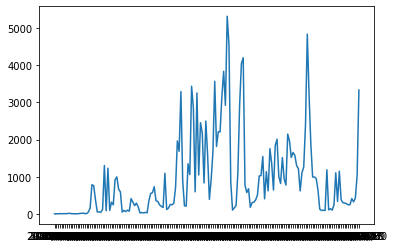

In [ ]:
#@title Gráfico Frequência Perguntas com Interrogação Sem Lugar
url_do_csv_para_usar = "/content/drive/My Drive/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


In [ ]:
#@title Pesquisa quanto a pessoas

qual_palavra = "presidente,governador,prefeito,deputado,bolso,bolsonaro,doria,mandetta,mandeta,moro,ministro,gov,min,hulk,luciano,pink,charles,elizabeth,boulos,ciro,lula,trump"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_pessoas_sem_local" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/drive/My Drive/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['presidente', 'governador', 'prefeito', 'deputado', 'bolso', 'bolsonaro', 'doria', 'mandetta', 'mandeta', 'moro', 'ministro', 'gov', 'min', 'hulk', 'luciano', 'pink', 'charles', 'elizabeth', 'boulos', 'ciro', 'lula', 'trump'] terminou 
 Foram filtrados um total de 12177 itens 
 sendo eles [0, 6, 42, 48, 101, 113, 144, 147, 152, 169, 175, 176, 194, 223, 230, 256, 257, 301, 304, 321, 340, 363, 365, 397, 405, 423, 432, 433, 451, 461, 488, 516, 522, 559, 576, 588, 590, 598, 633, 651, 665, 674, 696, 698, 714, 715, 716, 737, 754, 759, 775, 786, 789, 795, 801, 808, 810, 811, 828, 843, 866, 867, 868, 874, 898, 899, 952, 963, 968, 970, 976, 979, 986, 992, 1007, 1017, 1020, 1024, 1037, 1049, 1057, 1058, 1069, 1098, 1101, 1104, 1165, 1180, 1181, 1195, 1197, 1198, 1207, 1213, 1245, 1255, 1280, 1314, 1328, 1345, 1350, 1353, 1378, 1399, 1414, 1447, 1452, 1465, 1481, 1482, 1485, 1497, 1510, 1515, 1528, 1536, 1563, 1569, 1570, 1579, 1584, 1589, 1593, 1597, 1609, 1631, 1633, 163

In [ ]:
#@title Pesquisa quanto a doença

qual_palavra = "coronavirus,covid-19,covid,virus,gripezinha"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_coronavirus_sem_local" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/drive/My Drive/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['coronavirus', 'covid-19', 'covid', 'virus', 'gripezinha'] terminou 
 Foram filtrados um total de 54878 itens 
 sendo eles [1, 5, 8, 9, 13, 15, 18, 19, 26, 29, 32, 33, 34, 37, 39, 41, 44, 55, 56, 60, 62, 63, 66, 69, 71, 72, 74, 75, 79, 86, 89, 91, 93, 102, 108, 112, 117, 118, 120, 121, 122, 125, 126, 129, 131, 132, 135, 137, 140, 143, 144, 145, 149, 156, 157, 158, 163, 164, 165, 170, 180, 184, 186, 187, 188, 191, 192, 204, 211, 214, 217, 219, 225, 231, 234, 235, 236, 237, 243, 247, 248, 254, 255, 258, 266, 267, 269, 270, 271, 276, 283, 291, 292, 296, 297, 298, 299, 300, 306, 308, 309, 311, 313, 314, 315, 316, 318, 323, 326, 331, 335, 341, 342, 348, 350, 355, 358, 361, 362, 363, 364, 369, 374, 381, 385, 386, 389, 391, 393, 399, 401, 404, 407, 411, 422, 424, 425, 429, 435, 436, 437, 439, 442, 446, 447, 449, 451, 452, 453, 455, 464, 466, 472, 473, 475, 481, 484, 491, 493, 494, 496, 499, 502, 503, 504, 510, 515, 517, 518, 520, 521, 522, 524, 525, 527, 531, 532, 539,

In [ ]:
#@title Pesquisa quanto a organizações

qual_palavra = "prefeitura,delegacia,oms,organizacao,mundial,saude,brics,caixa"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_organizacoes_sem_local" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/drive/My Drive/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['prefeitura', 'delegacia', 'oms', 'organizacao', 'mundial', 'saude', 'brics', 'caixa'] terminou 
 Foram filtrados um total de 2743 itens 
 sendo eles [31, 59, 182, 192, 195, 221, 248, 300, 319, 412, 428, 578, 601, 673, 780, 812, 845, 888, 1002, 1034, 1099, 1113, 1195, 1251, 1401, 1468, 1551, 1679, 1840, 1893, 1904, 1924, 1985, 2051, 2085, 2346, 2349, 2365, 2384, 2508, 2534, 2720, 2792, 2808, 2867, 2894, 3195, 3265, 3310, 3316, 3342, 3352, 3442, 3490, 3493, 3508, 3563, 3574, 3595, 3639, 3655, 3736, 3739, 3798, 3811, 3820, 3880, 3903, 3906, 3933, 3975, 3994, 3997, 4001, 4017, 4027, 4064, 4083, 4154, 4203, 4370, 4371, 4394, 4417, 4491, 4607, 4655, 4685, 4945, 5015, 5024, 5088, 5128, 5283, 5348, 5537, 5580, 5617, 5780, 5813, 5894, 5909, 6232, 6249, 6312, 6531, 6549, 6608, 6645, 6718, 6724, 6758, 6824, 6843, 6893, 6894, 6948, 6951, 7021, 7089, 7098, 7130, 7237, 7288, 7296, 7378, 7399, 7403, 7421, 7427, 7441, 7470, 7472, 7482, 7508, 7585, 7657, 7686, 7697, 7729, 7804,

In [ ]:
#@title Pesquisa quanto a medicamento

qual_palavra = "cloroquina,cha,vitamina,zinco,inhame,pr\xF3polis,erva,ch\xE1,hidratacao,sopa,abacaxi"  #@param {type:"string"}
quais_palavras = qual_palavra.split(",")
formatar_texto = False #@param {type:"boolean"}
exportar_csv = True #@param {type:"boolean"}
nome_do_arquivo = "pesquisa_medicamento_sem_local" #@param {type:"string"}
usar_csv_url = True #@param {type:"boolean"}
url_do_csv = "/content/drive/My Drive/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
csv_para_usar = pd.read_csv("https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/DadosOrdemData.csv")

if (usar_csv_url):
  csv_para_usar = pd.read_csv(url_do_csv)

#print(quais_palavras)
filtrar_array_e_exportar_(csv_para_usar,False,quais_palavras,exportar_csv,nome_do_arquivo)




 Filtragem da palavra ['cloroquina', 'cha', 'vitamina', 'zinco', 'inhame', 'própolis', 'erva', 'chá', 'hidratacao', 'sopa', 'abacaxi'] terminou 
 Foram filtrados um total de 16511 itens 
 sendo eles [17, 24, 31, 36, 41, 45, 57, 59, 107, 109, 119, 123, 124, 130, 134, 144, 159, 171, 183, 219, 239, 250, 251, 257, 265, 275, 279, 282, 289, 294, 317, 328, 330, 332, 334, 353, 370, 375, 376, 378, 388, 411, 412, 415, 416, 418, 422, 423, 432, 441, 443, 450, 470, 487, 492, 500, 507, 529, 534, 537, 568, 579, 588, 598, 599, 602, 605, 626, 637, 642, 647, 669, 695, 714, 715, 716, 724, 741, 743, 758, 766, 772, 777, 779, 781, 789, 804, 822, 823, 828, 829, 848, 851, 869, 874, 881, 899, 938, 939, 950, 951, 965, 966, 976, 981, 992, 1001, 1003, 1007, 1008, 1012, 1021, 1024, 1029, 1031, 1037, 1041, 1050, 1060, 1077, 1104, 1119, 1147, 1153, 1154, 1165, 1172, 1198, 1200, 1204, 1208, 1214, 1217, 1237, 1249, 1251, 1253, 1268, 1274, 1275, 1278, 1283, 1306, 1312, 1315, 1318, 1319, 1321, 1323, 1326, 1328, 1332, 1

# Conclusões



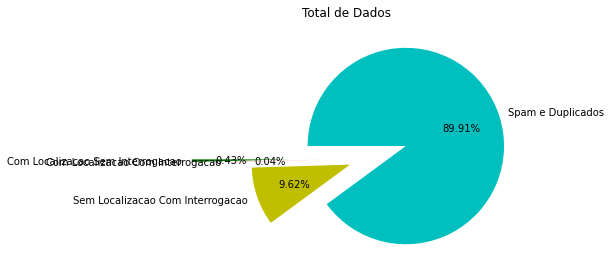

In [ ]:
#@title Visão Geral
labels = 'Com Localizacao Sem Interrogacao', 'Com Localizacao Com Interrogacao', 'Sem Localizacao Com Interrogacao', 'Spam e Duplicados'

local_sem_int = 7185
sem_local_int = 592
com_local_int = 159589
total = 1658825

valor1 = local_sem_int
valor2 = sem_local_int
valor3 = com_local_int

valor4 = total - (local_sem_int + com_local_int + sem_local_int )
sections = [valor1, valor2, valor3, valor4]
colors = ['g', 'r', 'y', 'c']

plt.pie(sections, labels=labels, colors=colors,
        startangle=180,
        explode = (0.8, 0.4, 0.2, 0.4),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Total de Dados \n')
plt.show()

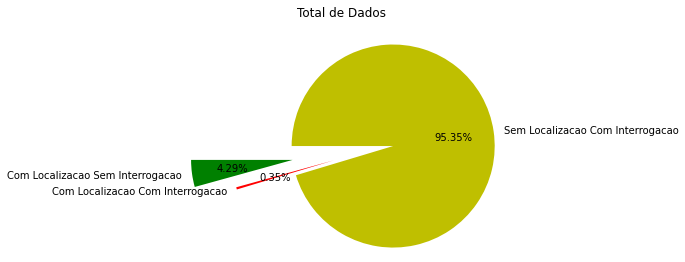

In [ ]:
#@title Utilisado

labels = 'Com Localizacao Sem Interrogacao', 'Com Localizacao Com Interrogacao', 'Sem Localizacao Com Interrogacao'

local_sem_int = 7185
sem_local_int = 592
com_local_int = 159589

valor1 = local_sem_int
valor2 = sem_local_int
valor3 = com_local_int

sections = [valor1, valor2, valor3]
colors = ['g', 'r', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=180,
        explode = (0.8, 0.4, 0.2),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Total de Dados \n')
plt.show()

## Sobre o processo

Quanto aos dados analisados, primeiro foi dado atenção a sua localização para a construção de um mapa e uma interface que facilita-se a leitura, no processo dessa construção a língua portuguesa e todas as suas nuanças se tornaram o maior obstáculos e a formatação da frase para sua interpretação se tornou um processo de constantes revisões que resultaram na compreensão do conteúdo presente e seus spams (citações, poemas, propagandas, assuntos diversos que fogem da proposta). Quando analisado os dados sem localização, jornais, reportagens e ciberataques de com perguntas redundantes se tornaram mais visíveis. Contudo, frases semelhantes porém variando em gênero e número não foram removidas no processo de duplicatas por falta de tempo e conhecimento técnico. 


In [ ]:
#@title Mapa interativo
url_para_uso = "/content/pesquisa_interrogacao_v2.csv" #@param {type:"string"}
def generate_map(url_do_csv):
  m = folium.Map(
      height='80%',
      width='80%',
      location=[-23.53, -46.79],
      zoom_start=4,
      tiles='Stamen Terrain'
  )
  csv_para_usar = pd.read_csv(url_do_csv)
  for i in range(len(csv_para_usar)):
    if (i < 500):
      filtro1 = csv_utilizado.iloc[i]['texto'].lower()
      # Para então buscado a interrogação e adicionando espaços ao redor dela
      filtro2 = filtro1.replace("?"," ? ") # assim, deixando a interrogacao mais visivel
      # As hashtags são removidas e substituídas por espaços
      filtro3 = filtro2.replace("#"," ") # remove hashtags
      # as quebras de linhas são substituidas por espaço
      filtro4 = filtro3.replace("\n"," ") # remove quebra de linha
      # a acentuação do i é removido para evitar conflitos como em vírus x virus
      filtro5 = filtro4.replace("í","i") # remove quebra de linha
      filtro6 = filtro5.replace('ã','a') # remove caractere especial
      filtro7 = filtro6.replace('.',' . ') # ajusta espaçamento de palavra
      filtro8 = filtro7.replace('ç','c') # remove caractere especial
      filtro9 = filtro8.replace('!',' ! ') # remove caractere especial
      filtro10 = filtro9.replace('ê','e') # remove caractere especial
      filtro11 = filtro10.replace(',', ' ') # ajusta espaçamento de palavra
      filtro12 = filtro11.replace('á', 'a') # ajusta espaçamento de palavra
      filtro13 = filtro12.replace('à', 'a') # ajusta espaçamento de palavra
      tooltip = csv_utilizado.iloc[i]['apelido'].lower()
      texto = '<i>' +  csv_utilizado.iloc[i]['data'].lower() + " em " + csv_utilizado.iloc[i]['lugar'].lower() + " - " + filtro11 +' </i>'
      latitude = csv_utilizado.iloc[i]['latitude']
      longitude = csv_utilizado.iloc[i]['longitude']
      folium.Marker([float(longitude),float(latitude)], popup=texto, tooltip=tooltip).add_to(m)
  
  return m

generate_map(url_para_uso)

## Sobre a frequência de postagens na rede social

Pelos gráficos de frequência o período de Abril até Junho foram os mais ativos na rede social analisada, fatores para isso incluem o isolamento social e a quarenta sugerida por diversos estados, mas quando analisados as principais notícias dos dias de pico a atividade de cada datasheet filtrado pode se atribuir esse aumento a “famosos doentes”, “social influencers de direita comprando briga com o STF”, “quantitativo de infectados ou mortes na china pela doença” e “o aumento do número de mortos no 
país”.


2020/04/07    5317
2020/06/01    4835
2020/04/08    4560
2020/04/16    4202
2020/04/15    4048
              ... 
2020/01/13       5
2020/01/12       4
2020/01/03       3
2020/01/14       3
2020/01/01       1
Name: data, Length: 172, dtype: int64 



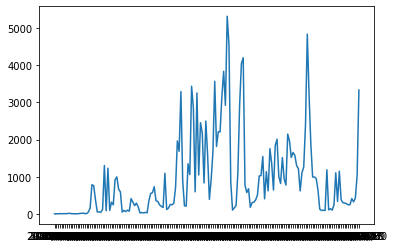

In [ ]:
#@title Gráfico Frequência Postagem
url_do_csv_para_usar = "https://raw.githubusercontent.com/Emiliandro/AtvLCD_M2020_1/master/datas_gerados/pesquisa_interrogacao_v4.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


## Sobre a doença

O nome da doença e suas variações foram os termos mais utilizados, porém isso não se reflete a qualidade do conteúdo onde as palavras estavam presentes nas frases. Contudo, os dias seguintes que se deram após o. começo de mortes em determinado estado foram os dias que houveram altas nas perguntas sobre prevenção a doença.


2020/03/18    194
2020/03/21    152
2020/04/04    129
2020/04/05    104
2020/03/31    100
             ... 
2020/06/16      1
2020/04/11      1
2020/02/19      1
2020/06/10      1
2020/06/13      1
Name: data, Length: 137, dtype: int64 



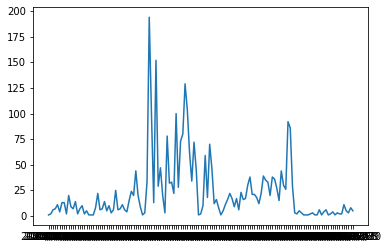

In [ ]:
#@title Gráfico Frequência Doença
url_do_csv_para_usar = "/content/pesquisa_coronavirus_geral_1.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


2020/03/18    2613
2020/04/05    2180
2020/04/04    2142
2020/03/21    1864
2020/03/31    1650
              ... 
2020/01/19       1
2020/01/11       1
2020/01/13       1
2020/01/08       1
2020/01/17       1
Name: data, Length: 162, dtype: int64 



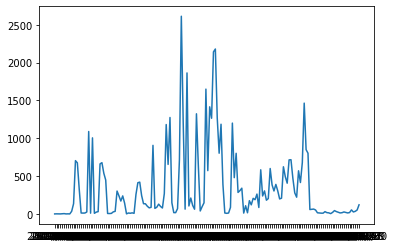

In [ ]:
#@title Gráfico Frequência Doença
url_do_csv_para_usar = "/content/pesquisa_coronavirus_sem_local.csv" #@param {type:"string"}
def grafico_frequencia(url_csv):
  csv_passado = pd.read_csv(url_csv)
  csv_utilizado = csv_passado.copy()
  new = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  csv_utilizado['data'] = new[0].str.replace('-','/')
  csv_utilizado['hora'] = new[1]
  g = csv_utilizado['data'].value_counts().sort_index()
  plt.plot(g)

  # new2 = csv_utilizado["data"].str.split(" ",n=1,expand=True)
  # array_datafmt = new[0].str.split('-',n=2,expand=True)
  # csv_utilizado['mes'] = array_datafmt[1]
  # csv_utilizado['hora'] = new[1]
  # g1 = csv_utilizado['mes'].value_counts().sort_index()
  # print(g1)

  print(csv_utilizado['data'].value_counts(), '\n')

grafico_frequencia(url_do_csv_para_usar)


## Agradecimentos

Graças ao trabalho desenvolvido foi perceptível a dificuldade do trabalho de interpretação de  grandes volumes de dados e da importância que as ferramentas como colab, github e as bibliotecas Pandas e Matplotlib têm no auxilio desse processo como um todo. Os autores dessa pesquisa agradecem a oportunidade do curso de especialização em Ciência de Dados cedido pela Universidade Estadual do Amazonas (UEA) e do aprendizado obtido graças aos professores doutores Elloa Guedes e Tiago Mello.
